<a href="https://colab.research.google.com/github/Nagendra320/Walmart-Data-Analysis/blob/main/Walmart_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
## About This Notebook
This notebook is crafted to perform an in-depth analysis of customer purchase behavior from Walmart during Black Friday. The focus is on understanding how customer demographics such as gender influence purchasing patterns.

## About Walmart
Walmart, an American multinational retail giant, operates a network of supercenters, discount department stores, and grocery stores worldwide. Known for its vast product selections and low prices, Walmart serves over 100 million customers globally, emphasizing its role as a leader in the retail sector. Walmart is committed to providing a seamless shopping experience and aims to meet the diverse needs of its customers through continuous innovation and customer-centered strategies.

## Business Problem
The management at Walmart has expressed interest in gaining deeper insights into the spending habits of their customers, specifically during Black Friday. There is a particular focus on analyzing the differences in spending between male and female customers. Understanding these differences will enable Walmart to refine their marketing and sales strategies, ensuring that promotions and product placements are optimally aligned with the purchasing behaviors of different customer segments.

## Analytical Approach
Our analytical journey will employ a combination of descriptive statistics, inferential statistics, and data visualization techniques to explore and interpret the data comprehensively. We aim to identify key patterns and differences in purchase behaviors among different demographic groups, with a particular emphasis on gender differences.

The approach will be grounded in:
- **Statistical Summary**: Where we look at basic statistics of the data.
- **Visualization**: To visually represent data for easier interpretation and to spot trends and outliers.

This structured analytical methodology will provide actionable insights that Walmart can use to optimize both in-store and online shopping experiences for its customers during future Black Fridays.

## Loading the Data
To start our analysis, we need to access and load the dataset containing the Black Friday purchase details. This dataset is assumed to be stored as a CSV file. We will use Python’s libraries, a set of robust tools for data manipulation, analysis and visualization. Initially, we will inspect the first few rows of the dataset to understand its structure and the types of data each column contains.

Let's proceed with loading the dataset and examining the initial data to set the stage for our detailed analysis.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [3]:
walmart=pd.read_csv('/content/drive/MyDrive/Data sets/walmart_data.csv')
walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
walmart.shape

(550068, 10)

In [5]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
walmart.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [7]:
for col in walmart.columns:
    print(f"{col} : {walmart[col].nunique()}\n")

User_ID : 5891

Product_ID : 3631

Gender : 2

Age : 7

Occupation : 21

City_Category : 3

Stay_In_Current_City_Years : 5

Marital_Status : 2

Product_Category : 20

Purchase : 18105



In [8]:
for col in walmart.columns:
    print(f"{col} : {walmart[col].unique()}\n")

User_ID : [1000001 1000002 1000003 ... 1004113 1005391 1001529]

Product_ID : ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']

Gender : ['F' 'M']

Age : ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Occupation : [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

City_Category : ['A' 'C' 'B']

Stay_In_Current_City_Years : ['2' '4+' '3' '1' '0']

Marital_Status : [0 1]

Product_Category : [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]

Purchase : [ 8370 15200  1422 ...   135   123   613]



## Univariate Analysis
Univariate analysis involves the examination of each variable in a dataset independently. This type of analysis is crucial as it helps us to understand the distribution, central tendency, variability, and presence of outliers in the data. By analyzing variables one by one, we can gather insights about the characteristics of the data which might not be apparent in multivariate analysis. This step is fundamental in identifying patterns, anomalies, or peculiarities that might warrant a deeper investigation or consideration during further analyses.

In this section, we will conduct a univariate analysis for each variable in our dataset. This will include:

* **Bar Plots** for categorical variables to see the distribution of categories.
* **Histograms/KDE** Plots for continuous variables to observe their distribution.
* **Box Plots** to identify outliers and understand the spread of continuous variables.

This analysis will enable us to decide if any transformations, such as binning or normalizing the data, are necessary before we proceed to bivariate or multivariate analysis.

In [9]:
walmart.groupby('Gender').agg(count=('User_ID','nunique')).reset_index()

,Gender,count
0,F,1666
1,M,4225


In [10]:
walmart.groupby('Age').agg(count=('User_ID','nunique')).reset_index()

,Age,count
0,0-17,218
1,18-25,1069
2,26-35,2053
3,36-45,1167
4,46-50,531
5,51-55,481
6,55+,372


In [11]:
walmart.groupby('City_Category').agg(count=('User_ID','nunique')).reset_index()

,City_Category,count
0,A,1045
1,B,1707
2,C,3139


In [12]:
walmart.groupby('Stay_In_Current_City_Years').agg(count=('User_ID','nunique')).reset_index()

,Stay_In_Current_City_Years,count
0,0,772
1,1,2086
2,2,1145
3,3,979
4,4+,909


In [13]:
walmart.groupby('Marital_Status').agg(count=('User_ID','nunique')).reset_index()

,Marital_Status,count
0,0,3417
1,1,2474


In [14]:
walmart.groupby('Occupation').agg(count=('User_ID','nunique')).reset_index()

,Occupation,count
0,0,688
1,1,517
2,2,256
3,3,170
4,4,740
5,5,111
6,6,228
7,7,669
8,8,17
9,9,88


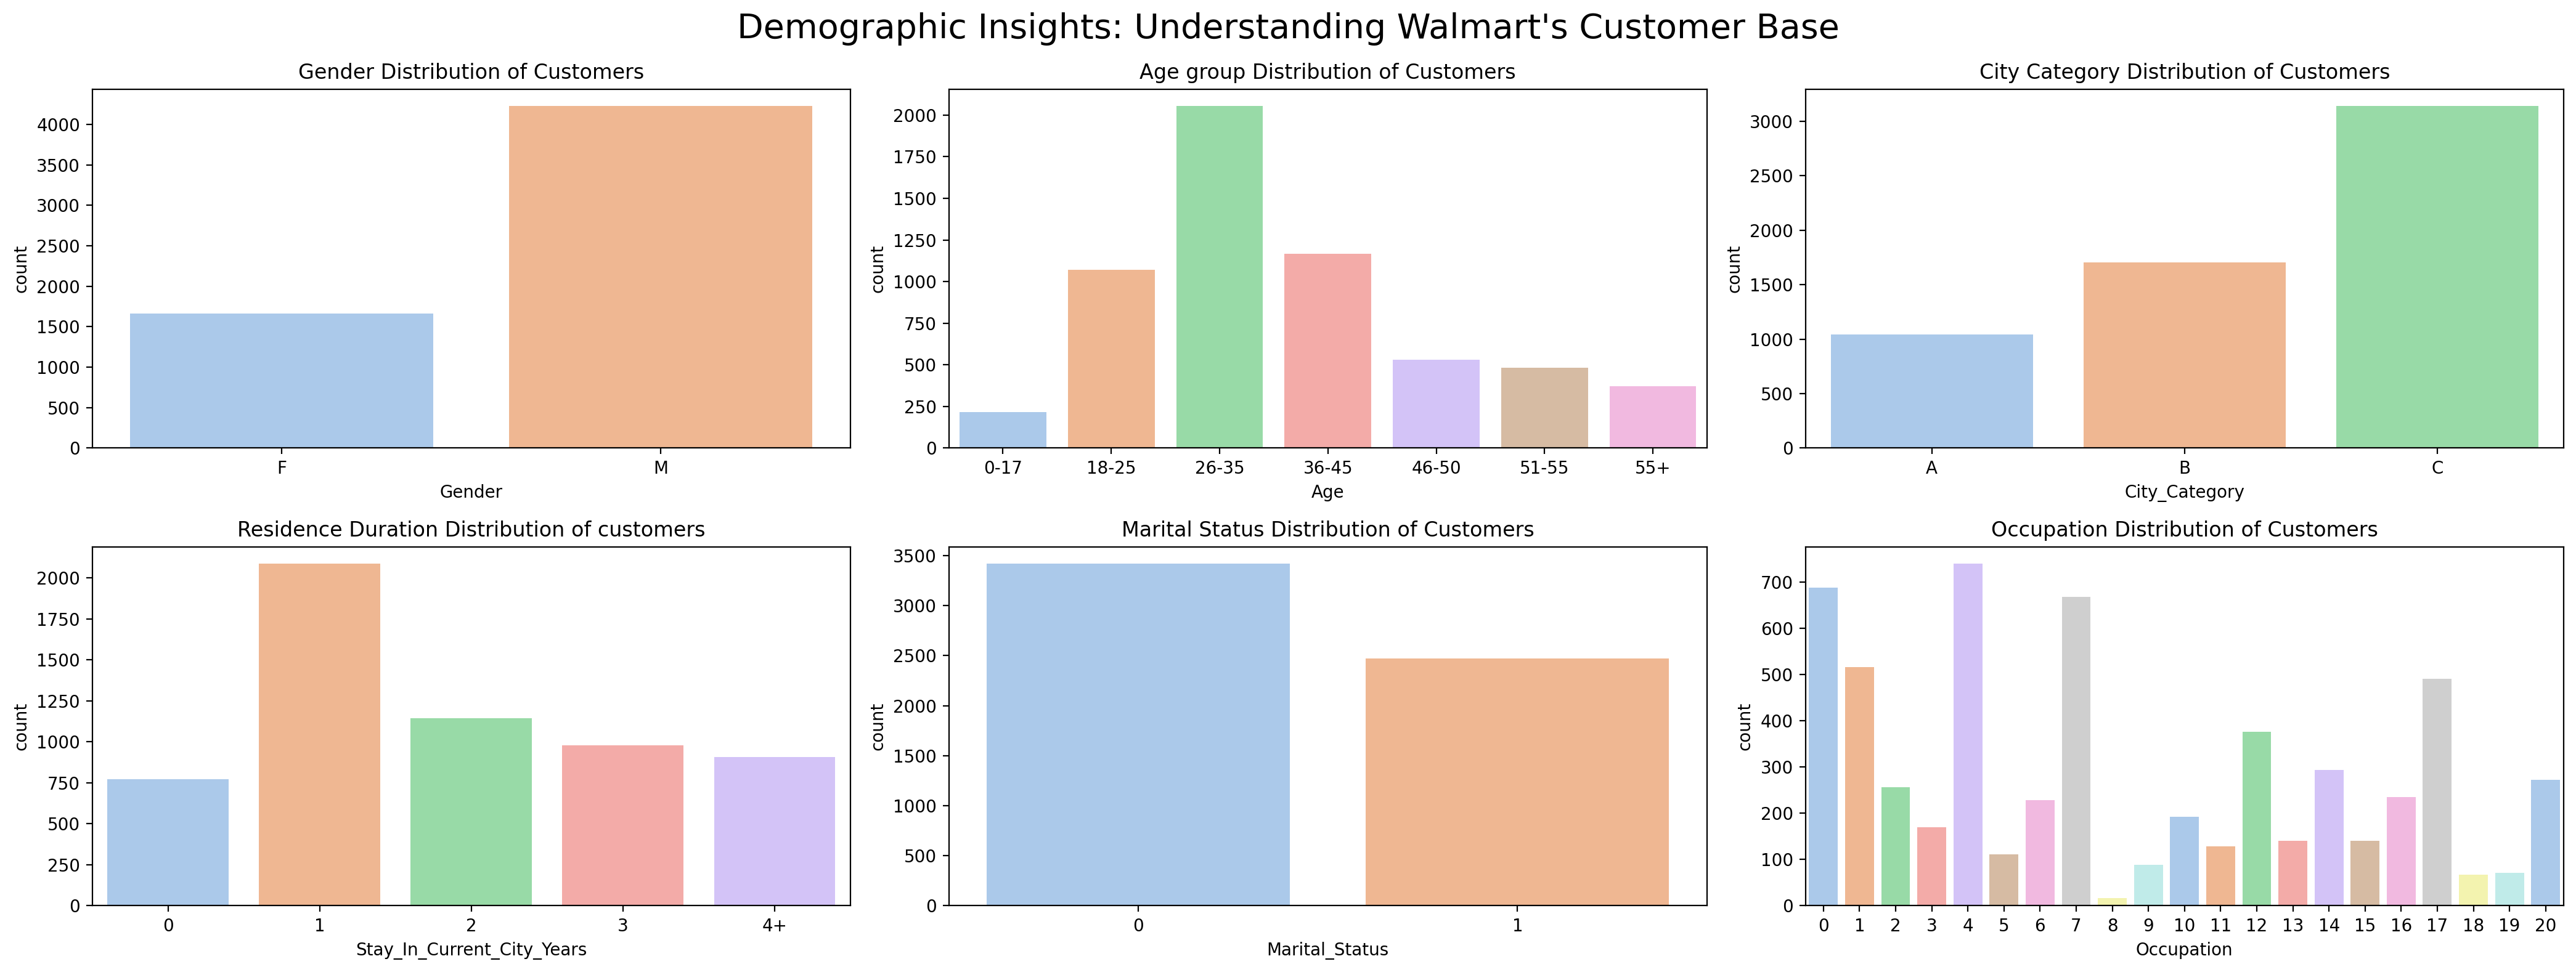

In [15]:
# Setting up the canvas
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(21,8),dpi=200)

# Ploting commands
sns.barplot(data=walmart.groupby('Gender').agg(count=('User_ID','nunique')).reset_index(),x='Gender',y='count',ax=axs[0,0], hue='Gender', palette='pastel', legend=False)
sns.barplot(data=walmart.groupby('Age').agg(count=('User_ID','nunique')).reset_index(),x='Age',y='count',ax=axs[0,1], hue='Age', palette='pastel', legend=False)
sns.barplot(data=walmart.groupby('City_Category').agg(count=('User_ID','nunique')).reset_index(),x='City_Category',y='count',ax=axs[0,2], hue='City_Category', palette='pastel', legend=False)
sns.barplot(data=walmart.groupby('Stay_In_Current_City_Years').agg(count=('User_ID','nunique')).reset_index(),x='Stay_In_Current_City_Years',y='count',ax=axs[1,0], hue='Stay_In_Current_City_Years', palette='pastel', legend=False)
sns.barplot(data=walmart.groupby('Marital_Status').agg(count=('User_ID','nunique')).reset_index(),x='Marital_Status',y='count',ax=axs[1,1], hue='Marital_Status', palette='pastel', legend=False)
sns.barplot(data=walmart.groupby('Occupation').agg(count=('User_ID','nunique')).reset_index(),x='Occupation',y='count',ax=axs[1,2], hue='Occupation', palette='pastel', legend=False, width=0.8)

# Titles
plt.suptitle("Demographic Insights: Understanding Walmart's Customer Base",size=20)
axs[0,0].set_title('Gender Distribution of Customers')
axs[0,1].set_title('Age group Distribution of Customers')
axs[0,2].set_title('City Category Distribution of Customers')
axs[1,0].set_title('Residence Duration Distribution of customers')
axs[1,1].set_title('Marital Status Distribution of Customers')
axs[1,2].set_title('Occupation Distribution of Customers')

# Adjust subplot to avoid overlap
plt.tight_layout()

# Display plot
plt.show()

### Summary of Walmart's Customer Demographics:

**Gender Distribution:**
- The data indicates a significant gender disparity among Walmart customers, with males (4,225 unique users) outnumbering females (1,666 unique users) by more than two to one. This suggests that marketing strategies might need to be adjusted to either capitalize on or attempt to balance this skew.

**Age Distribution:**
- The majority of Walmart's customers fall within the 26-35 age range (2,053 unique users), followed by the 36-45 age bracket (1,167 unique users). The younger (0-17) and older (55+) age groups are the least represented, which could influence product range and marketing campaigns targeted at the most active customer segments.

**City Category Distribution:**
- Customers from City Category C (3,139 unique users) dominate the dataset, followed by those from Category B (1,707 unique users), and Category A (1,045 unique users). This indicates a stronger or more appealing presence in City Category C, possibly pointing to regional preferences or urban shopping trends.

**Residence Duration (Stay In Current City Years):**
- A large segment of the customers (2,086 unique users) has resided in their current city for 1 year. Those with longer residence durations (4+ years) are fewer (909 unique users). This could suggest a higher mobility rate among Walmart's customer base or a stronger appeal to newer residents in a city.

**Marital Status Distribution:**
- Single customers (0 - unmarried; 3,417 unique users) are more prevalent than married customers (1 - married; 2,474 unique users). This demographic information could be vital for targeting different product categories and marketing messages.

**Occupation Distribution:**
- The dataset shows a wide range in the distribution of customers across different occupations, with Occupation 4 (740 unique users) and Occupation 0 (688 unique users) being the most common. Some occupations, like Occupation 8, are very underrepresented (17 unique users), which might reflect the socio-economic factors influencing shopping patterns at Walmart.

In [16]:
walmart.groupby('Product_Category').agg(count=('Product_ID','nunique')).reset_index()

,Product_Category,count
0,1,493
1,2,152
2,3,90
3,4,88
4,5,967
5,6,119
6,7,102
7,8,1047
8,9,2
9,10,25


In [17]:
walmart.groupby('Product_Category').agg(total_purchase=('Purchase','sum')).reset_index()

,Product_Category,total_purchase
0,1,1910013754
1,2,268516186
2,3,204084713
3,4,27380488
4,5,941835229
5,6,324150302
6,7,60896731
7,8,854318799
8,9,6370324
9,10,100837301


In [18]:
walmart.groupby('Product_Category').agg(avg_purchase=('Purchase','mean')).reset_index()

,Product_Category,avg_purchase
0,1,13606.218596
1,2,11251.935384
2,3,10096.705734
3,4,2329.659491
4,5,6240.088178
5,6,15838.478550
6,7,16365.689600
7,8,7498.958078
8,9,15537.375610
9,10,19675.570927


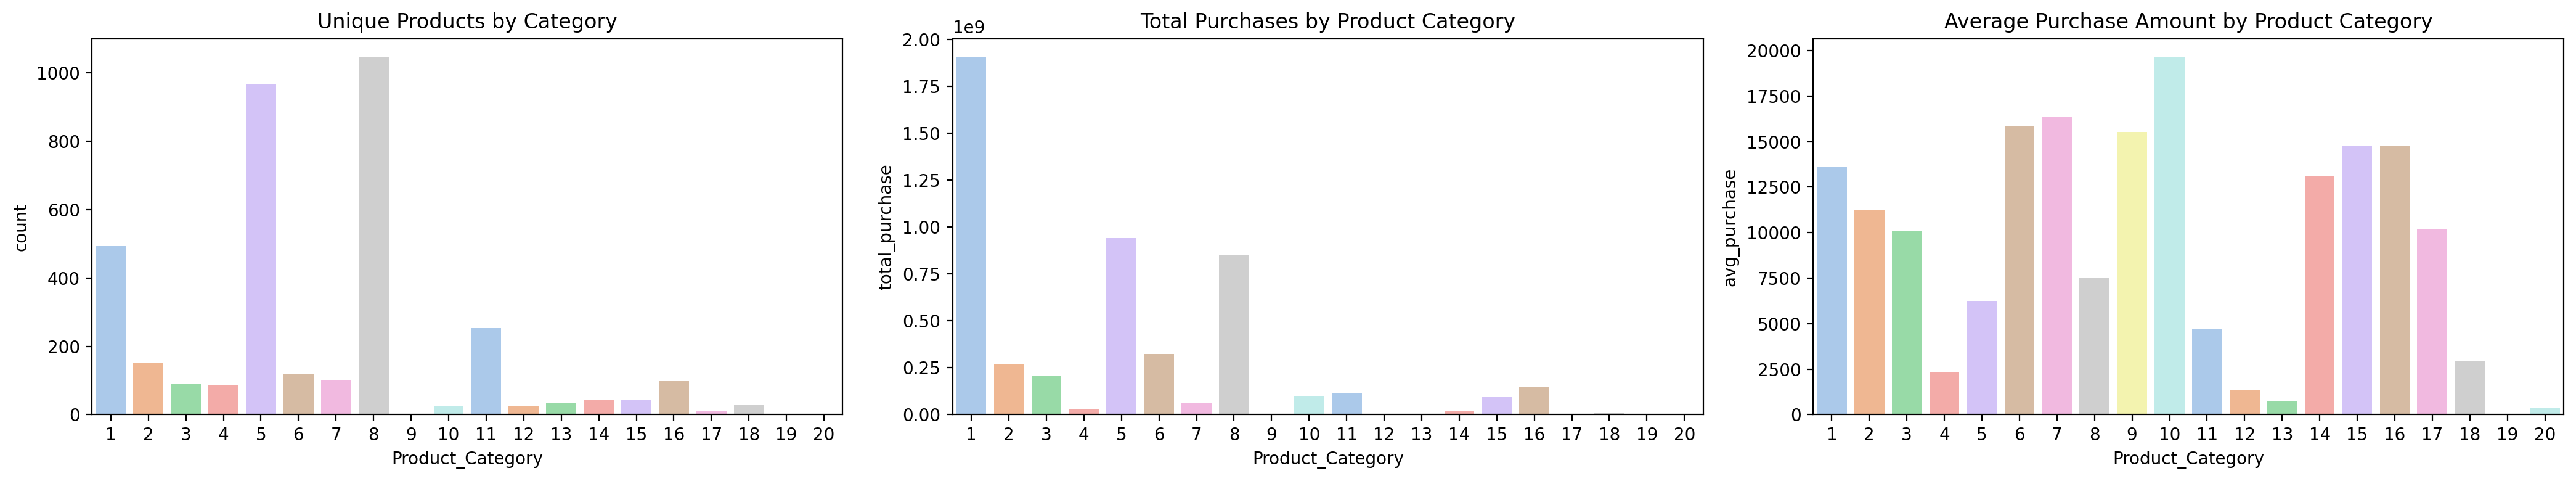

In [19]:
# Setting up the canvas
fig,axs=plt.subplots(nrows=1, ncols=3, figsize=(21,4), dpi=200)

# Ploting commands
sns.barplot(data=walmart.groupby('Product_Category').agg(count=('Product_ID','nunique')).reset_index(),x='Product_Category',y='count', hue='Product_Category', palette='pastel', legend=False, ax=axs[0])
sns.barplot(data=walmart.groupby('Product_Category').agg(total_purchase=('Purchase','sum')).reset_index(),x='Product_Category',y='total_purchase', hue='Product_Category', palette='pastel', legend=False, ax=axs[1])
sns.barplot(data=walmart.groupby('Product_Category').agg(avg_purchase=('Purchase','mean')).reset_index(),x='Product_Category',y='avg_purchase', hue='Product_Category', palette='pastel', legend=False, ax=axs[2])

# Titles
axs[0].set_title('Unique Products by Category')
axs[1].set_title('Total Purchases by Product Category')
axs[2].set_title('Average Purchase Amount by Product Category')

# Adjust subplot to avoid overlap
plt.tight_layout()

# Display plot
plt.show()

**1. Unique Products by Category:**
- This graph showcases the diversity of Walmart's product offerings across various categories. Category 8 and Category 5 dominate with 1,047 and 967 unique products, respectively, highlighting their broad appeal and possibly greater shelf space. In contrast, categories such as 9, 19, and 20, with only 2 or 3 products each, indicate niche markets with limited product ranges.

**2. Total Purchases by Product Category:**
- The total purchases graph illustrates which categories generate the most revenue. Category 1 leads with a substantial margin, indicating its high sales volume and/or higher-priced items contributing to a total purchase sum of over $1.9 billion. Categories such as 4 and 19 are on the lower end, suggesting either less consumer interest or lower pricing structures.

**3. Average Purchase Amount by Product Category:**
- This graph reveals insights into the average spending per product in each category. Category 10 and Category 6 exhibit the highest average purchase amounts, suggesting these categories may include premium products or less frequent, high-value purchases. In contrast, categories like 18 and 19 show considerably lower average spends, which could reflect lower-cost items or less frequent buying.

Combining insights from all three graphs, it's evident that some categories, despite having fewer unique products, generate significant revenue either through high unit prices or strong consumer demand. Conversely, categories with many products do not necessarily equate to high revenue.

In [20]:
walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [21]:
walmart.groupby('User_ID')['Purchase'].sum().reset_index()

,User_ID,Purchase
0,1000001,334093
1,1000002,810472
2,1000003,341635
3,1000004,206468
4,1000005,821001
...,...,...
5886,1006036,4116058
5887,1006037,1119538
5888,1006038,90034
5889,1006039,590319


In [22]:
walmart.groupby('User_ID')['Purchase'].mean().reset_index()

,User_ID,Purchase
0,1000001,9545.514286
1,1000002,10525.610390
2,1000003,11780.517241
3,1000004,14747.714286
4,1000005,7745.292453
...,...,...
5886,1006036,8007.894942
5887,1006037,9176.540984
5888,1006038,7502.833333
5889,1006039,7977.283784


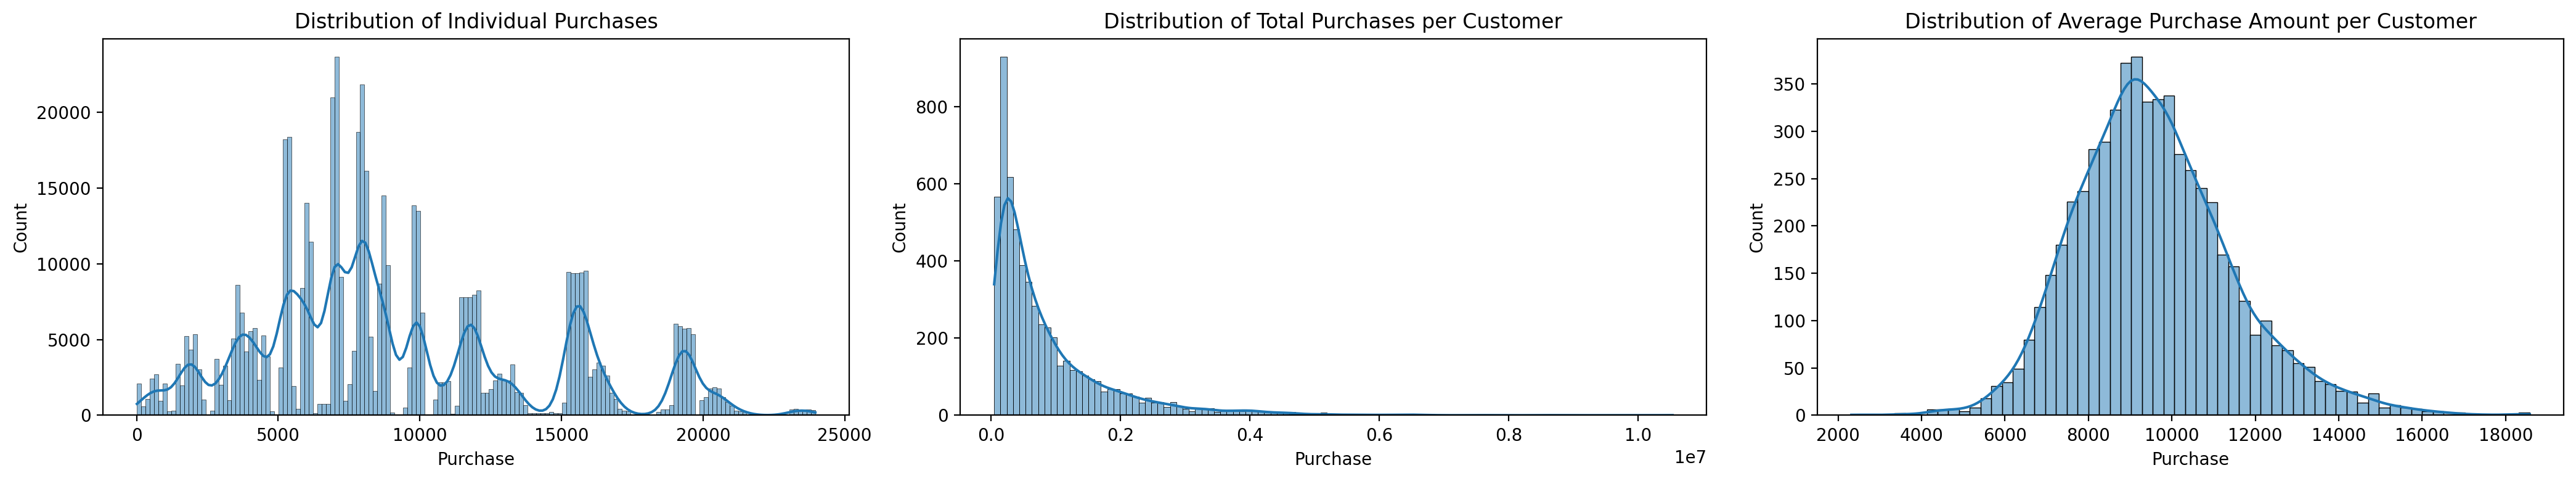

In [23]:
# Setting up the canvas
fig,axs=plt.subplots(ncols=3, nrows=1, figsize=(21,4), dpi=200)

# Ploting commands
sns.histplot(data=walmart, x='Purchase', kde=True, ax=axs[0])
sns.histplot(data=walmart.groupby('User_ID')['Purchase'].sum().reset_index(), x='Purchase', kde=True, ax=axs[1])
sns.histplot(data=walmart.groupby('User_ID')['Purchase'].mean().reset_index(), x='Purchase', kde=True, ax=axs[2])

# Titles
axs[0].set_title('Distribution of Individual Purchases')
axs[1].set_title('Distribution of Total Purchases per Customer')
axs[2].set_title('Distribution of Average Purchase Amount per Customer')

# Adjust subplot to avoid overlap
plt.tight_layout()

# Display plot
plt.show()

**1.Distribution of Individual Purchases**
- The histogram of individual purchases highlights an uneven distribution, predominantly concentrated between \$5,000 and \$10,000. This skew towards lower purchase amounts suggests that most transactions at Walmart are for moderately priced items. The spread and shape of the distribution might indicate buying patterns or preferred product price ranges among Walmart customers.

**2.Distribution of Total Purchases per Customer**
- This graph is right-skewed, indicating that the majority of customers at Walmart spend relatively modest amounts with a few exceptions of exceptionally high expenditures. This tail of high spenders represents a small, but financially significant, group of customers whose buying behavior can significantly impact total sales figures. Strategies such as volume discounts or loyalty rewards could be effective in increasing average spend across the broader customer base while maintaining the engagement of high spenders.

**3.Distribution of Average Purchase Amount per Customer**
- The distribution of average purchases per customer is normally distributed, centering between \$8,000 and \$10,000. This suggests that while there are outliers, most customers' spending behavior is consistent and predictable, making it easier to forecast sales and stock requirements accurately. Understanding this distribution helps Walmart in tailoring its marketing and stocking strategies to match the purchasing patterns of its average customer.

Given the insights from both graphs, while the total purchase distribution helps identify high-value customers, the average purchase distribution provides a more standardized view of customer spending behavior.

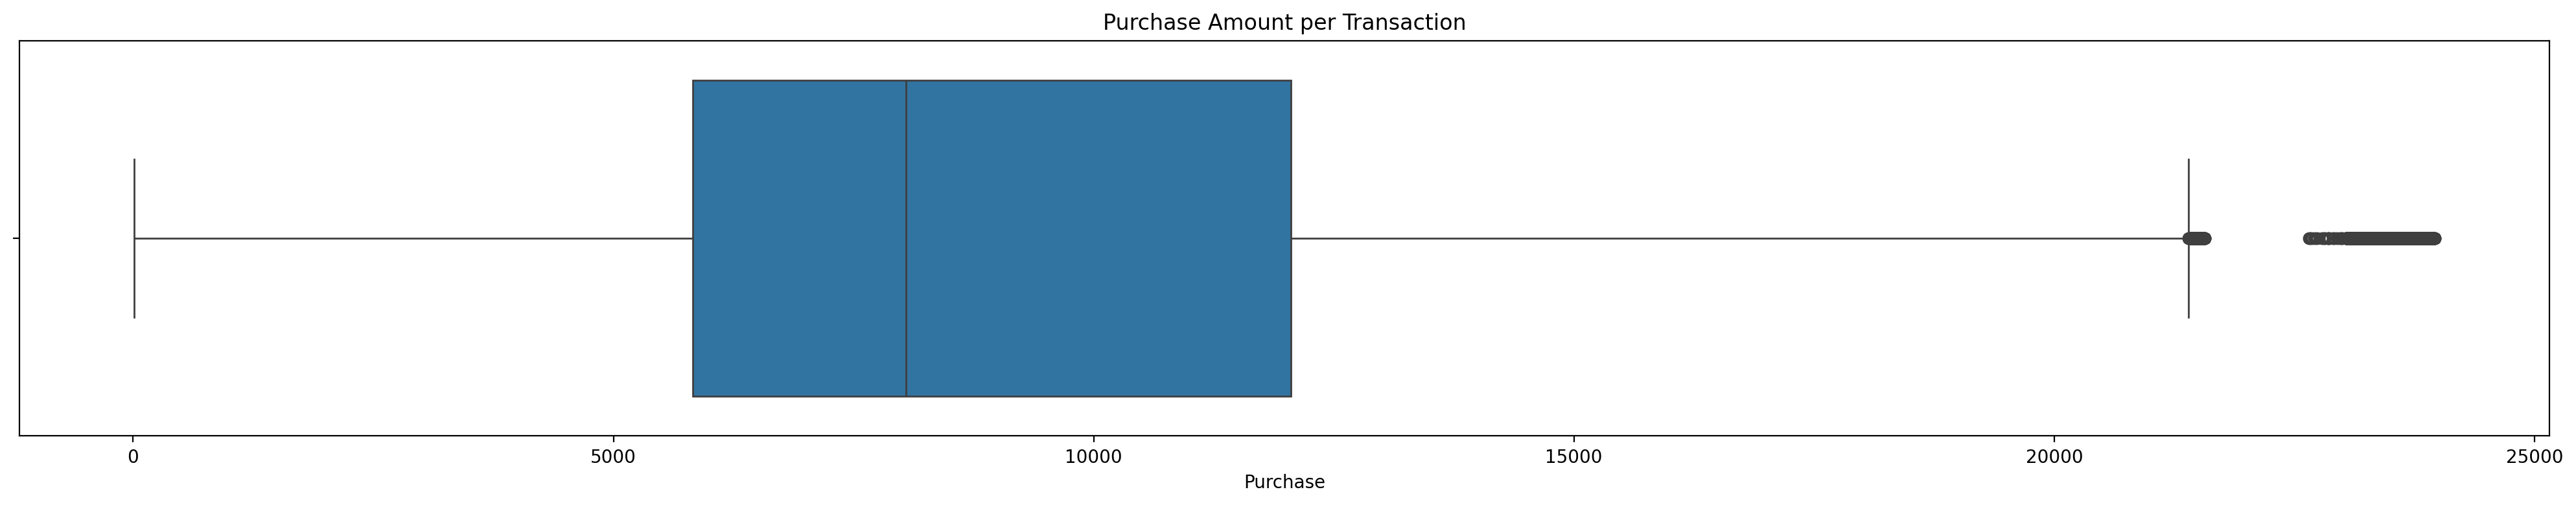

In [24]:
# Setting up the canvas
fig,axs=plt.subplots(figsize=(20,4), dpi=200)

# Ploting commands
sns.boxplot(data=walmart, x='Purchase')

# Titles
axs.set_title('Purchase Amount per Transaction')

# Adjust subplot to avoid overlap
plt.tight_layout()

# Display plot
plt.show()

**Analysis of Purchase Amount per Transaction**

The distribution of purchase amounts per transaction at Walmart reveals that the median purchase lies in the region of $8,000. This central tendency suggests that a typical shopping transaction falls within this range, underlining it as a common spending amount among customers.

However, the presence of significant outliers indicates that there are transactions with unusually high purchase amounts, far exceeding the general shopping trend. These outliers may represent bulk purchases or high-ticket items, which could skew the average purchase value if not accounted for separately. Understanding these anomalies is crucial for accurately interpreting the overall spending behavior and for tailoring marketing strategies to both typical consumers and high-value transactions.

In [25]:
q1=walmart.describe().loc['25%','Purchase']
q3=walmart.describe().loc['75%','Purchase']

iqr=q3-q1

outlier_data=walmart.loc[walmart['Purchase']>q3+(1.5*iqr)]

In [26]:
outlier_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341


In [27]:
outlier_data.groupby('Product_Category').agg(count=('Product_ID','nunique'))

,count
Product_Category,
9,1
10,22
15,25


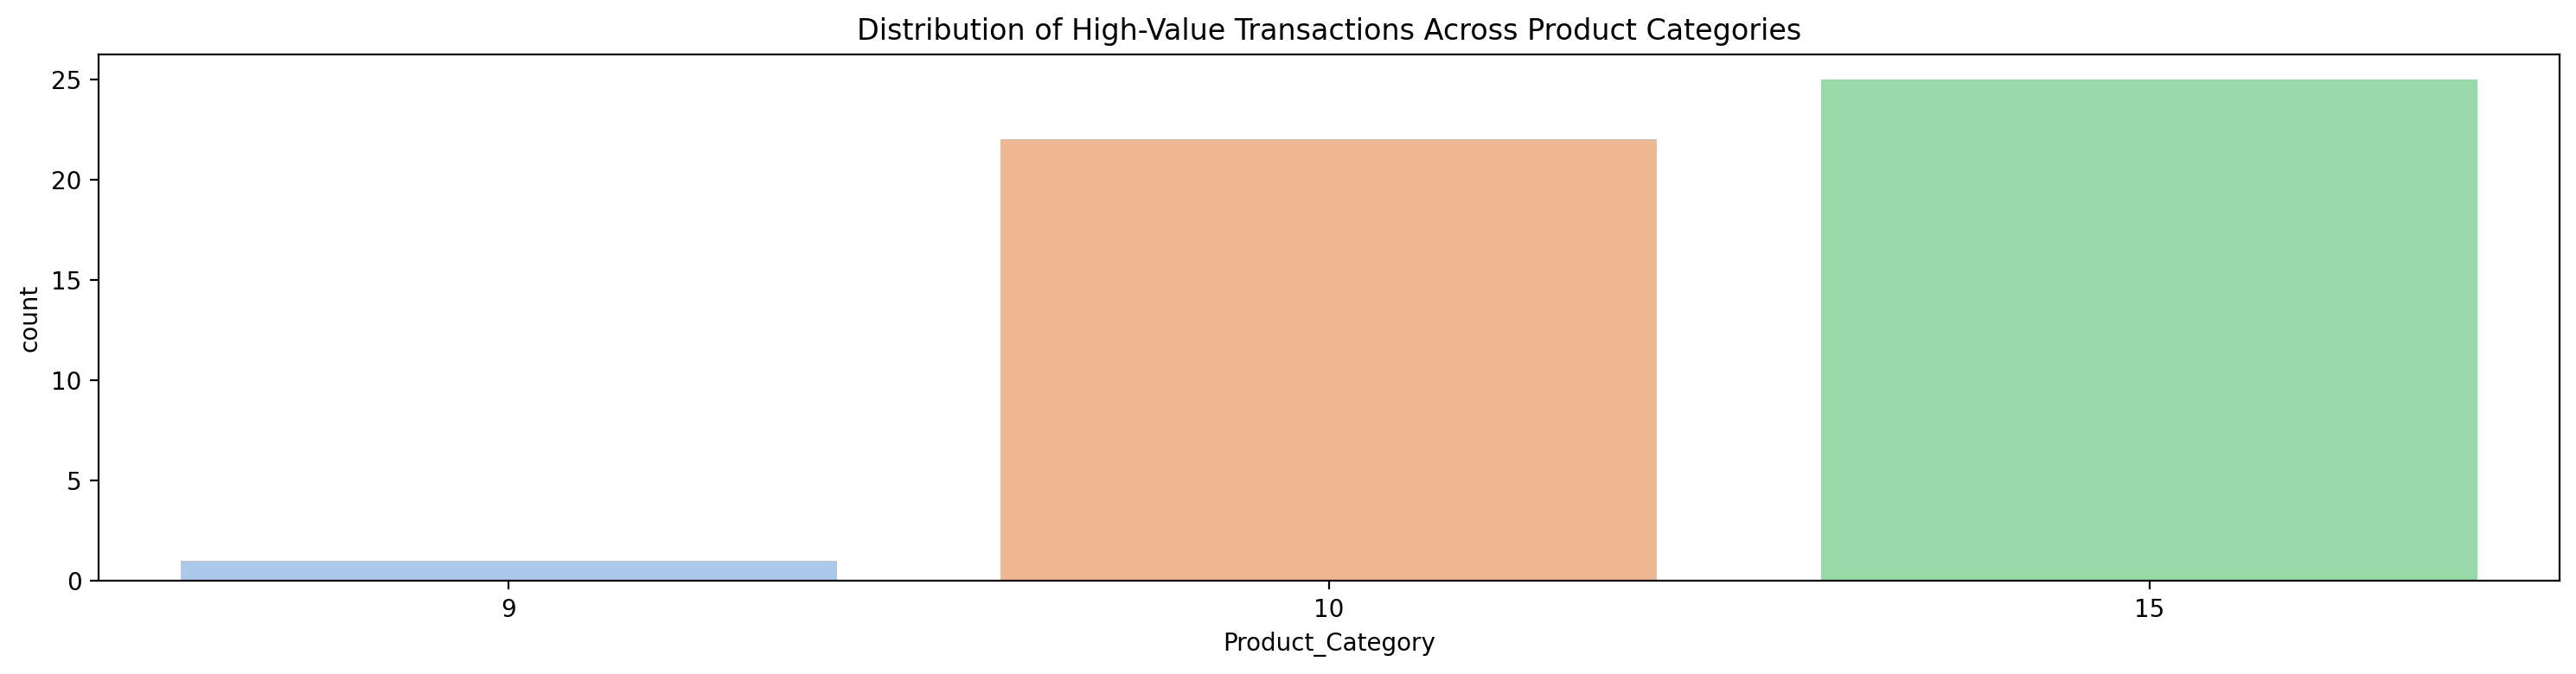

In [28]:
# Setting up the canvas
fig,axs=plt.subplots(figsize=(15,4), dpi=200)

# Ploting commands
sns.barplot(data=outlier_data.groupby('Product_Category').agg(count=('Product_ID','nunique')).reset_index(), x='Product_Category', y='count', hue='Product_Category', palette='pastel', legend=False)

# Titles
axs.set_title('Distribution of High-Value Transactions Across Product Categories')

# Adjust subplot to avoid overlap
plt.tight_layout()

# Display plot
plt.show()

**Analysis of High-Value Transactions by Product Category**

This analysis focuses on the distribution of product categories where the transaction amounts exceed $21,400.5, highlighting significant spending in specific areas. Product categories 10 and 15 exhibit a notably higher number of unique products that fall into this high-value transaction bracket, suggesting these categories might include premium items or bulk purchase options that drive up the transaction value. Interestingly, although product category 9 contains only two products, one of them qualifies as a high-value transaction, indicating an exceptionally premium product within this category.

In [29]:
walmart['User_ID'].value_counts().nlargest(20).reset_index()

,User_ID,count
0,1001680,1026
1,1004277,979
2,1001941,898
3,1001181,862
4,1000889,823
5,1003618,767
6,1001150,752
7,1001015,740
8,1005795,729
9,1005831,727


In [30]:
walmart.groupby('User_ID')['Purchase'].sum().nlargest(20).reset_index()

,User_ID,Purchase
0,1004277,10536909
1,1001680,8699596
2,1002909,7577756
3,1001941,6817493
4,1000424,6573609
5,1004448,6566245
6,1005831,6512433
7,1001015,6511314
8,1003391,6477160
9,1001181,6387961


In [31]:
walmart.groupby('User_ID')['Purchase'].mean().nlargest(20).reset_index()

,User_ID,Purchase
0,1003902,18577.893617
1,1005069,18490.166667
2,1005999,18345.944444
3,1001349,18162.739130
4,1003461,17508.700000
5,1000101,17246.439394
6,1002983,16790.612903
7,1005994,16787.071429
8,1000592,16776.571429
9,1004474,16639.941176


## Bivariate Analysis

Bivariate analysis is the simultaneous examination of two variables to explore relationships and interactions between them. This analysis is fundamental in understanding the correlation, association, or potential causality between variables within a dataset. By assessing pairs of variables, bivariate analysis can help identify trends, inconsistencies, or noteworthy patterns that might be obscured when variables are analyzed in isolation.

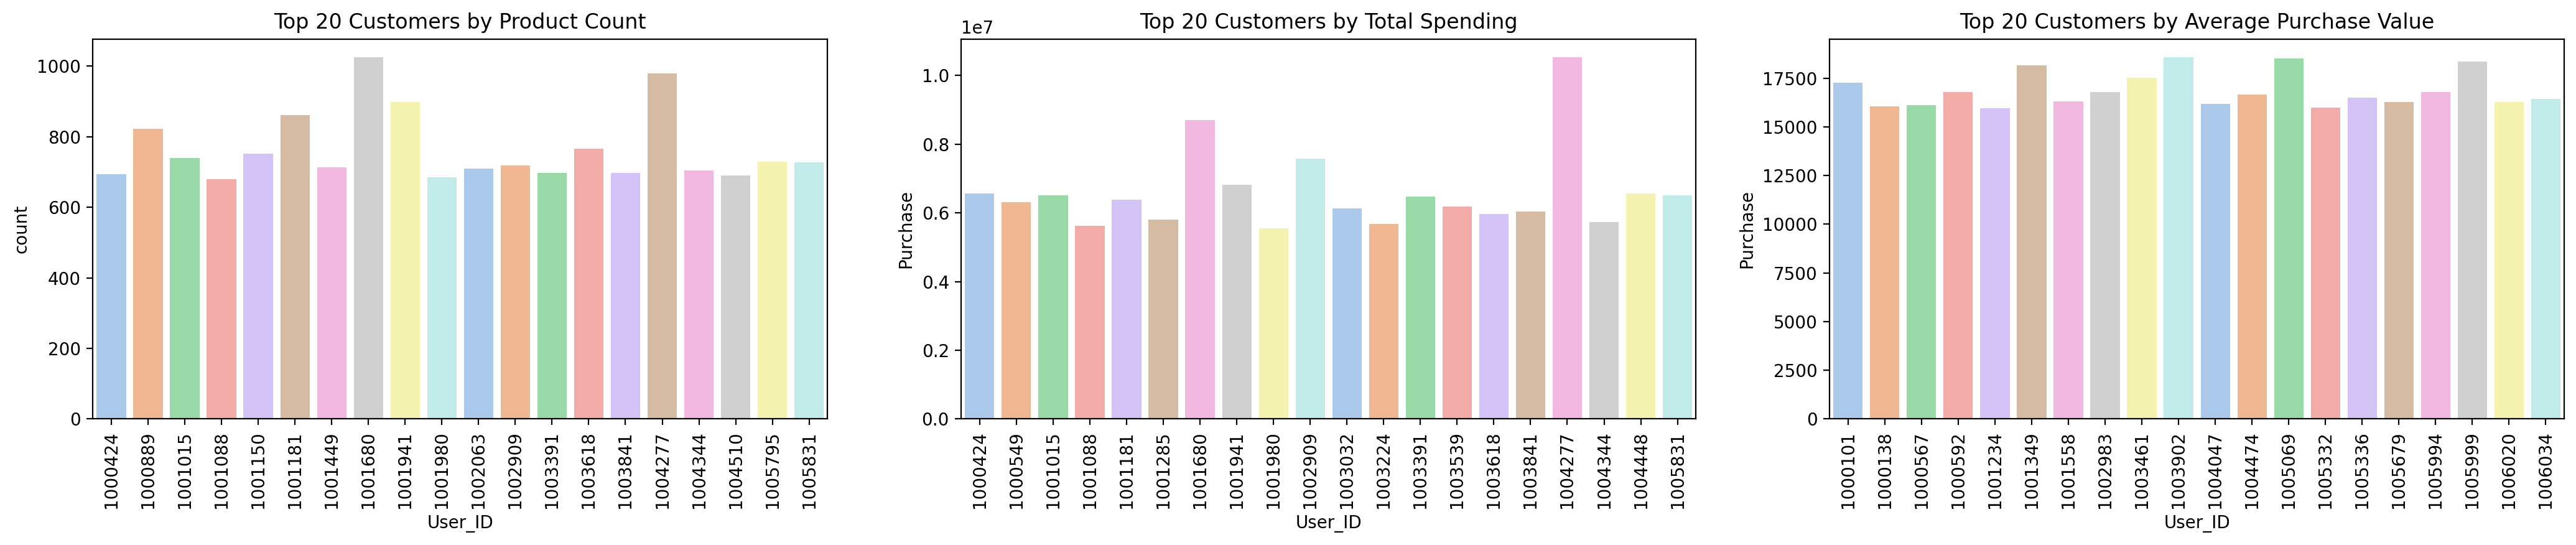

In [32]:
# Setting up the canvas
fig,axs=plt.subplots(nrows=1, ncols=3, figsize=(21,4), dpi=200)

# Ploting commands
sns.barplot(data=walmart['User_ID'].value_counts().nlargest(20).reset_index(),x='User_ID',y='count', hue='User_ID', palette='pastel', legend=False, ax=axs[0])
sns.barplot(data=walmart.groupby('User_ID')['Purchase'].sum().nlargest(20).reset_index(), x='User_ID', y='Purchase',hue='User_ID', palette='pastel', legend=False, ax=axs[1])
sns.barplot(data=walmart.groupby('User_ID')['Purchase'].mean().nlargest(20).reset_index(), x='User_ID', y='Purchase',hue='User_ID', palette='pastel', legend=False, ax=axs[2])

# Titles
axs[0].set_title('Top 20 Customers by Product Count')
axs[1].set_title('Top 20 Customers by Total Spending')
axs[2].set_title('Top 20 Customers by Average Purchase Value')

# Adjust subplot to avoid overlap
plt.tight_layout()
axs[0].tick_params(axis='x', rotation=90)
axs[1].tick_params(axis='x', rotation=90)
axs[2].tick_params(axis='x', rotation=90)

# Display plot
plt.show()

**1. Top 20 Users by Transaction Count:**
- This graph identifies the users with the highest number of transactions at Walmart. User 1001680 leads with over 1,000 transactions, indicating a high level of engagement with the store. Such frequent shopping behavior suggests these users may benefit from targeted loyalty programs or personalized marketing strategies to further enhance their shopping experience.

**2. Top 20 Users by Total Spending:**
- Focusing on total expenditure, User 1004277 tops the chart with spending over $10.5 million, reflecting high purchasing power or possibly organizational buying rather than individual. The users listed here are critical from a revenue perspective, and understanding their purchasing patterns could be vital for inventory and promotional planning.

**3. Top 20 Users by Average Purchase Value:**
- This graph showcases users with the highest average spending per transaction, with User 1003902 at the forefront, spending approximately $18,578 per purchase. This suggests that these users are either buying high-ticket items or shopping in bulk. Tailoring high-value product offerings and premium services to these customers could enhance their satisfaction and loyalty.

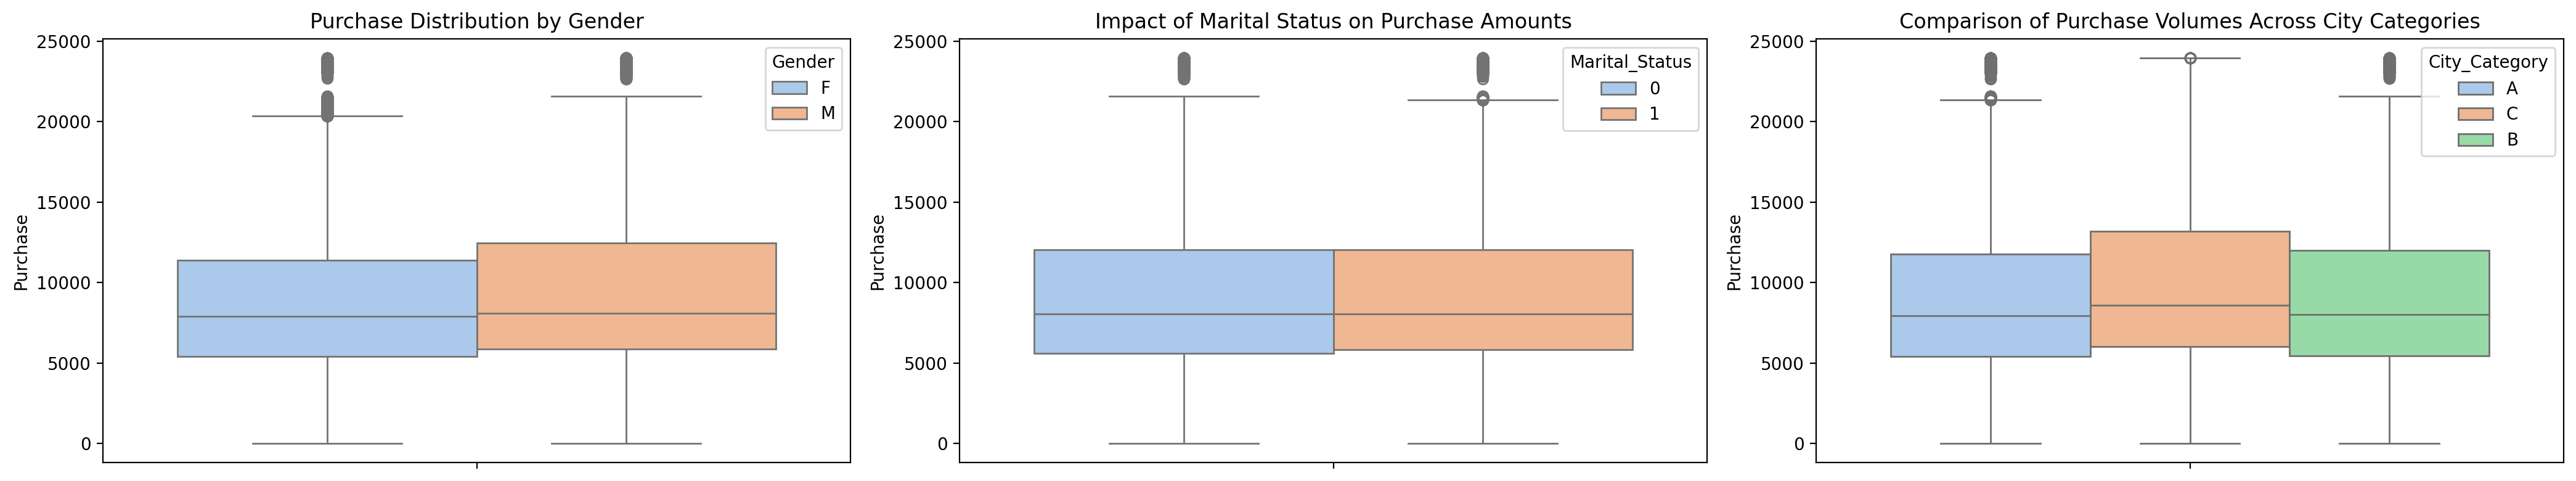

In [33]:
# Setting up the canvas
fig,axs=plt.subplots(nrows=1, ncols=3, figsize=(21,4), dpi=200)

# Ploting commands
sns.boxplot(data=walmart, y='Purchase', hue='Gender', palette='pastel', ax=axs[0])
sns.boxplot(data=walmart, y='Purchase', hue='Marital_Status', palette='pastel', ax=axs[1])
sns.boxplot(data=walmart, y='Purchase', hue='City_Category', palette='pastel', ax=axs[2])

# Titles
axs[0].set_title('Purchase Distribution by Gender')
axs[1].set_title('Impact of Marital Status on Purchase Amounts')
axs[2].set_title('Comparison of Purchase Volumes Across City Categories')

# Adjust subplot to avoid overlap
plt.tight_layout()

# Display plot
plt.show()

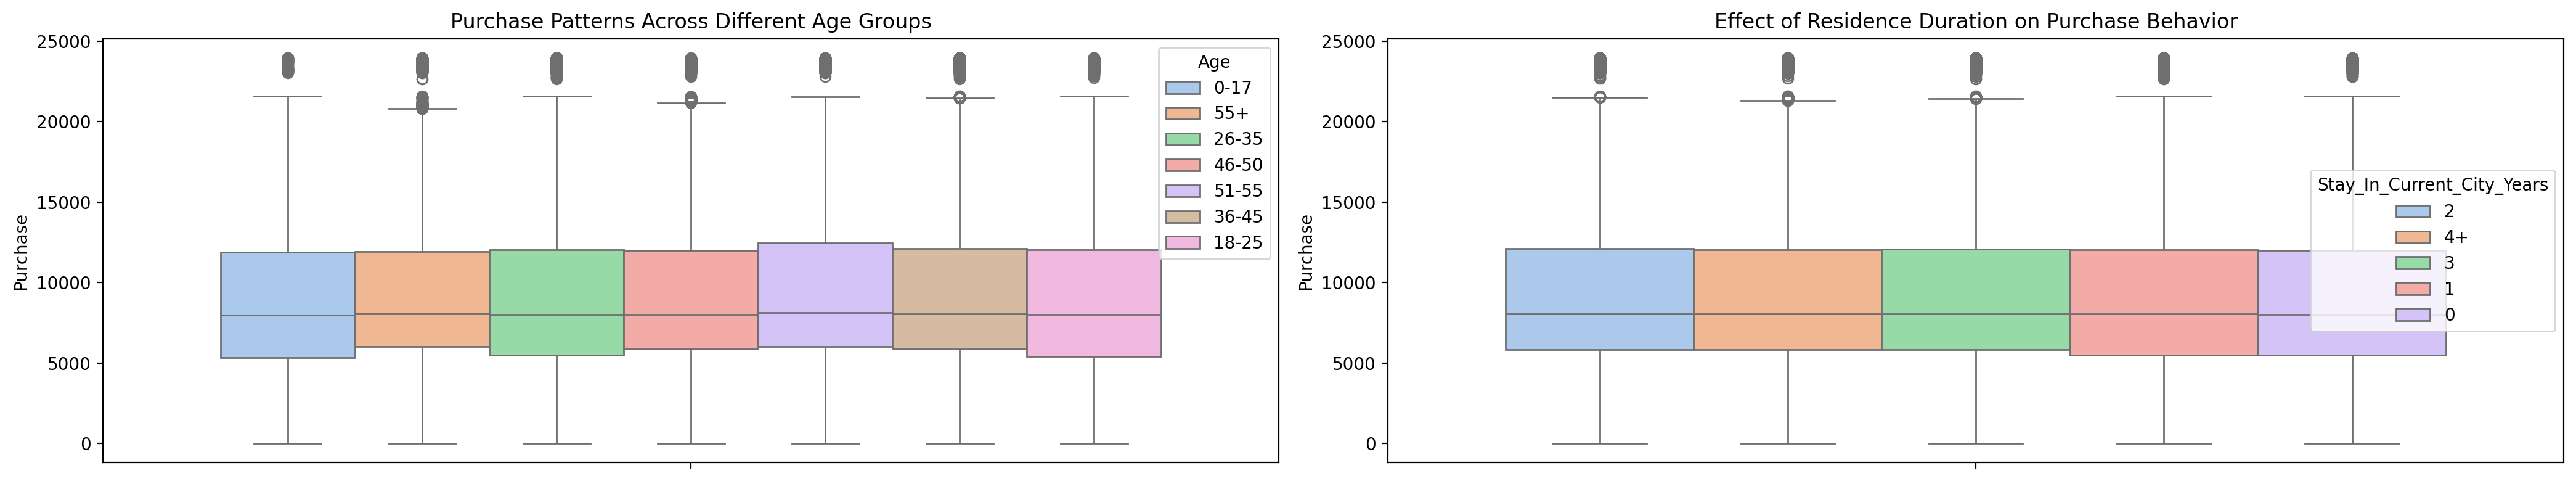

In [34]:
# Setting up the canvas
fig,axs=plt.subplots(nrows=1, ncols=2, figsize=(21,4), dpi=200)

# Ploting commands
sns.boxplot(data=walmart, y='Purchase', hue='Age', palette='pastel', ax=axs[0])
sns.boxplot(data=walmart, y='Purchase', hue='Stay_In_Current_City_Years', palette='pastel', ax=axs[1])

# Titles
axs[0].set_title('Purchase Patterns Across Different Age Groups')
axs[1].set_title('Effect of Residence Duration on Purchase Behavior')

# Adjust subplot to avoid overlap
plt.tight_layout()

# Display plot
plt.show()

From the distribution observed in the graphs, it's evident that the median or mean purchase amounts across different categories remain relatively consistent. Each category demonstrates a similar interquartile range (spanning from Q1 to Q3), suggesting that the central tendency and spread of purchase values are comparable across groups. Moreover, each category exhibits its own set of significant outliers, indicating that while the central metrics of purchase behavior are consistent, there are exceptional spending behaviors unique to each group. This consistency in central measures alongside the presence of outliers in every category underscores a broadly similar purchasing pattern that is punctuated by occasional, notable deviations in consumer spending.

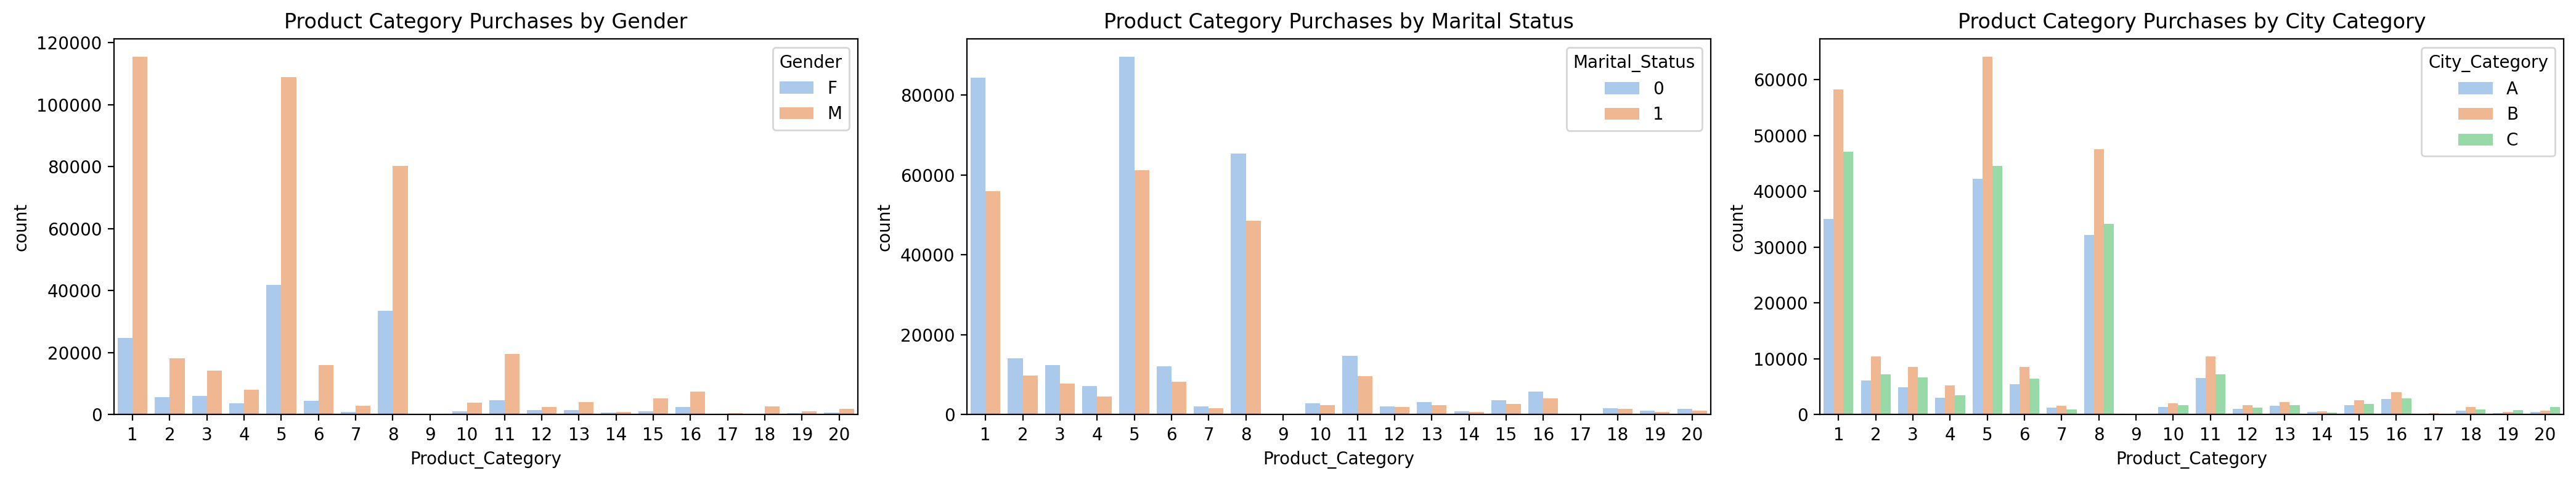

In [35]:
# Setting up the canvas
fig,axs=plt.subplots(nrows=1, ncols=3, figsize=(21,4), dpi=200)

# Ploting commands
sns.barplot(data=walmart.groupby(['Gender']).agg(count=('Product_Category','value_counts')).reset_index(),x='Product_Category',y='count', hue='Gender', palette='pastel', ax=axs[0])
sns.barplot(data=walmart.groupby(['Marital_Status']).agg(count=('Product_Category','value_counts')).reset_index(),x='Product_Category',y='count', hue='Marital_Status', palette='pastel', ax=axs[1])
sns.barplot(data=walmart.groupby(['City_Category']).agg(count=('Product_Category','value_counts')).reset_index(),x='Product_Category',y='count', hue='City_Category', palette='pastel', ax=axs[2])

# Titles
axs[0].set_title('Product Category Purchases by Gender')
axs[1].set_title('Product Category Purchases by Marital Status')
axs[2].set_title('Product Category Purchases by City Category')

# Adjust subplot to avoid overlap
plt.tight_layout()

# Display plot
plt.show()

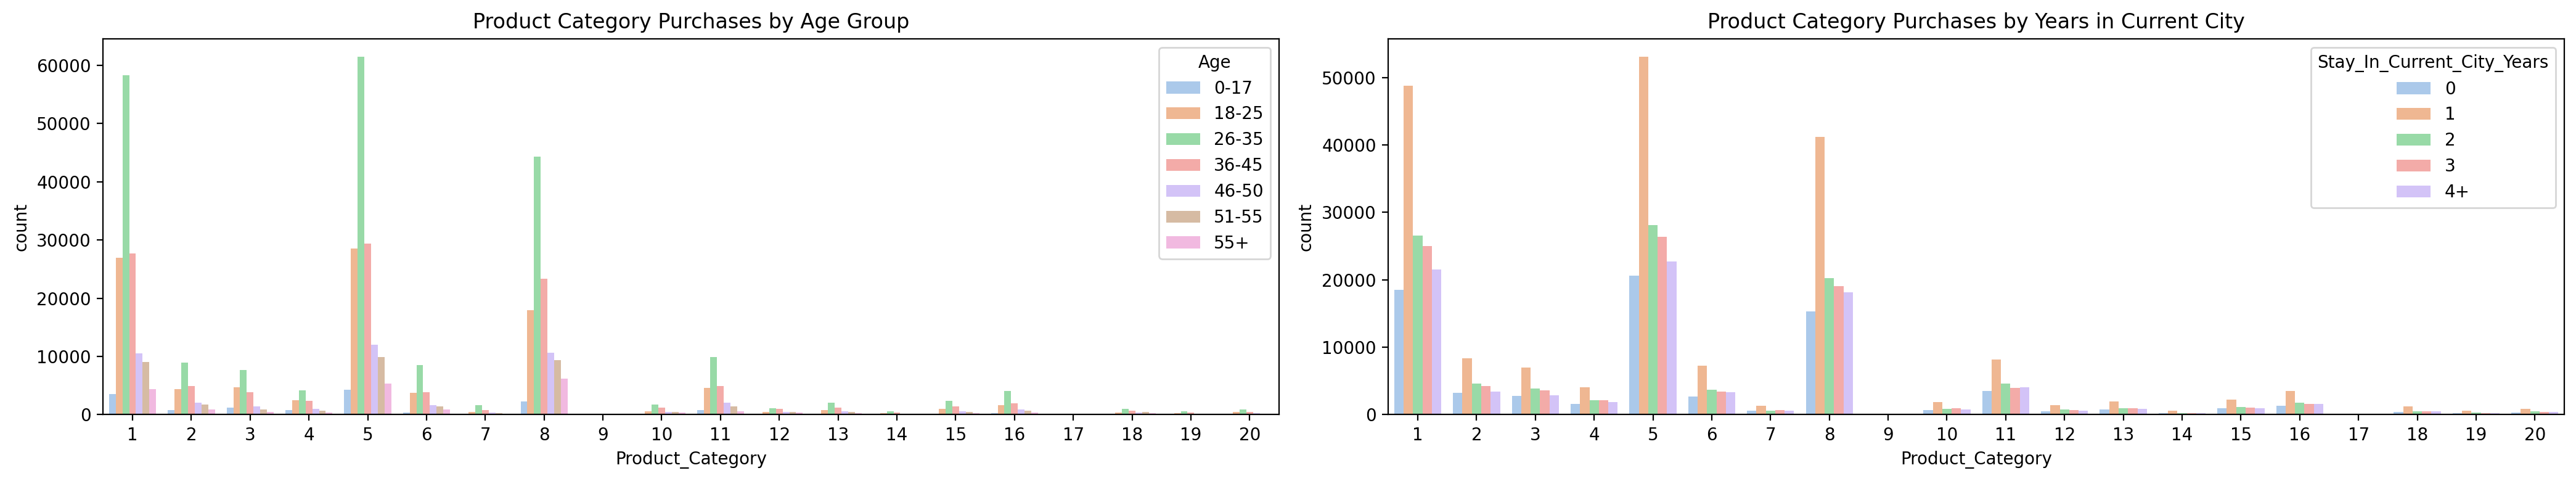

In [36]:
# Setting up the canvas
fig,axs=plt.subplots(nrows=1, ncols=2, figsize=(21,4), dpi=200)

# Ploting commands
sns.barplot(data=walmart.groupby(['Age']).agg(count=('Product_Category','value_counts')).reset_index(),x='Product_Category',y='count', hue='Age', palette='pastel', ax=axs[0])
sns.barplot(data=walmart.groupby(['Stay_In_Current_City_Years']).agg(count=('Product_Category','value_counts')).reset_index(),x='Product_Category',y='count', hue='Stay_In_Current_City_Years', palette='pastel', ax=axs[1])

# Titles
axs[0].set_title('Product Category Purchases by Age Group')
axs[1].set_title('Product Category Purchases by Years in Current City')

# Adjust subplot to avoid overlap
plt.tight_layout()

# Display plot
plt.show()

From our series of graphs, we observe a consistent pattern of high purchase volumes in product categories 1, 5, and 8 across various demographics:

1. **Purchases by Gender**: Men are the predominant buyers in most product categories, particularly noticeable in categories 1, 5, and 8, indicating a strong male interest in these segments.
   
2. **Purchases by Marital Status**: Unmarried customers show higher purchasing activity across the key product categories, suggesting that single shoppers may have more discretionary spending or different needs compared to their married counterparts.
   
3. **Purchases by City Category**: Shoppers from City Category B lead in purchasing, closely followed by those from City Category A, across most product categories. This pattern suggests varying consumer behavior influenced by the urban environment.
   
4. **Purchases by Age Group**: The age groups from 26 to 35 years show the highest purchasing rates, particularly in the leading product categories, with the 18-25 and 36-45 age brackets following closely. This indicates that younger to middle-aged adults are the most active shoppers.
   
5. **Purchases by Years in Current City**: Customers who have resided in their current city for "1 year" exhibit more purchasing than those with longer residency. This may reflect a trend where newer residents are in a phase of setting up their homes or adjusting to new life circumstances, which influences their purchasing patterns.

## **Central Limit Theorem (CLT)**

When analyzing data using the Central Limit Theorem (CLT), the goal is to verify whether the sample means from a population converge towards the population mean as predicted by the theorem. This method is particularly useful in validating whether samples drawn from a population, no matter how the data is distributed, will have sample means that form a normal distribution centered around the population mean. Here’s a brief explanation of how this is achieved:

1. **Understanding the Central Limit Theorem**: The CLT states that the distribution of sample means approximates a normal distribution, regardless of the population's original distribution, provided the sample size is sufficiently large (usually n > 30).

2. **Purpose of the Analysis**: The primary objective is to sample multiple subsets of data from a large dataset to check if the means of these subsets (sample means) closely estimate the mean of the entire dataset (population mean). This analysis helps to confirm the reliability of using sample data to infer characteristics of the whole dataset.

3. **Procedure**:
   - **Calculate the Population Mean**: First, compute the mean of the entire dataset, which serves as the benchmark (population mean).
   - **Sampling**: Randomly select multiple subsets of data (samples), ensuring each sample is of adequate size.
   - **Calculate Sample Means**: For each sample drawn, calculate its mean.
   - **Compare Means**: Evaluate how these sample means distribute around the population mean. Ideally, the means should form a normal distribution, centering around the population mean as more samples are considered.

4. **Significance of the Analysis**: This process is crucial because it provides confidence in statistical inferences made from sample data, supporting decisions or predictions about the larger dataset. It demonstrates the applicability of the sample mean as a reliable estimate of the population mean.

Through this analysis, we not only reinforce the fundamental concepts of statistical sampling and inference but also ensure that our dataset's sample means are representative of the entire population, thereby enabling accurate predictions and decisions based on sampled data.

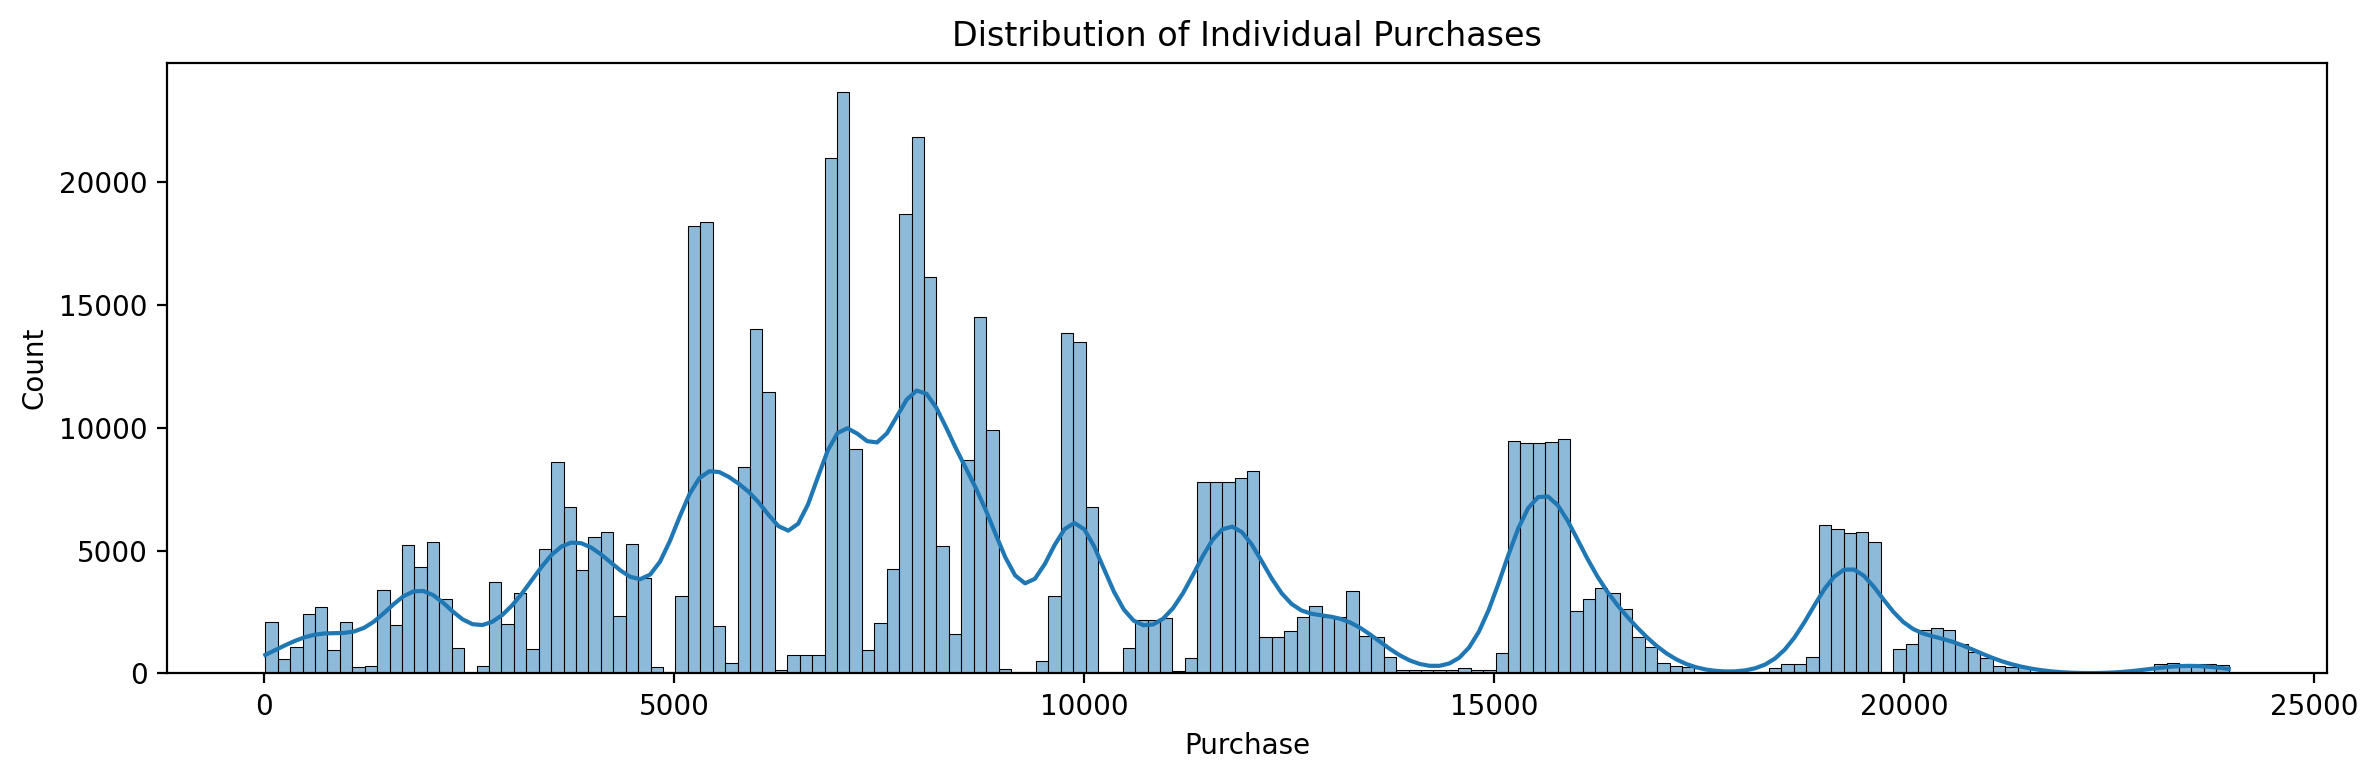

In [37]:
# Setting up the canvas
fig,axs=plt.subplots(figsize=(12,4), dpi=200)

# Ploting commands
sns.histplot(data=walmart, x='Purchase', kde=True)

# Titles
axs.set_title('Distribution of Individual Purchases')

# Adjust subplot to avoid overlap
plt.tight_layout()

# Display plot
plt.show()

The population mean is: 9263.97
Mean of 50 samples:9270.64418
Standard deviation of 50 samples:693.4096174000816



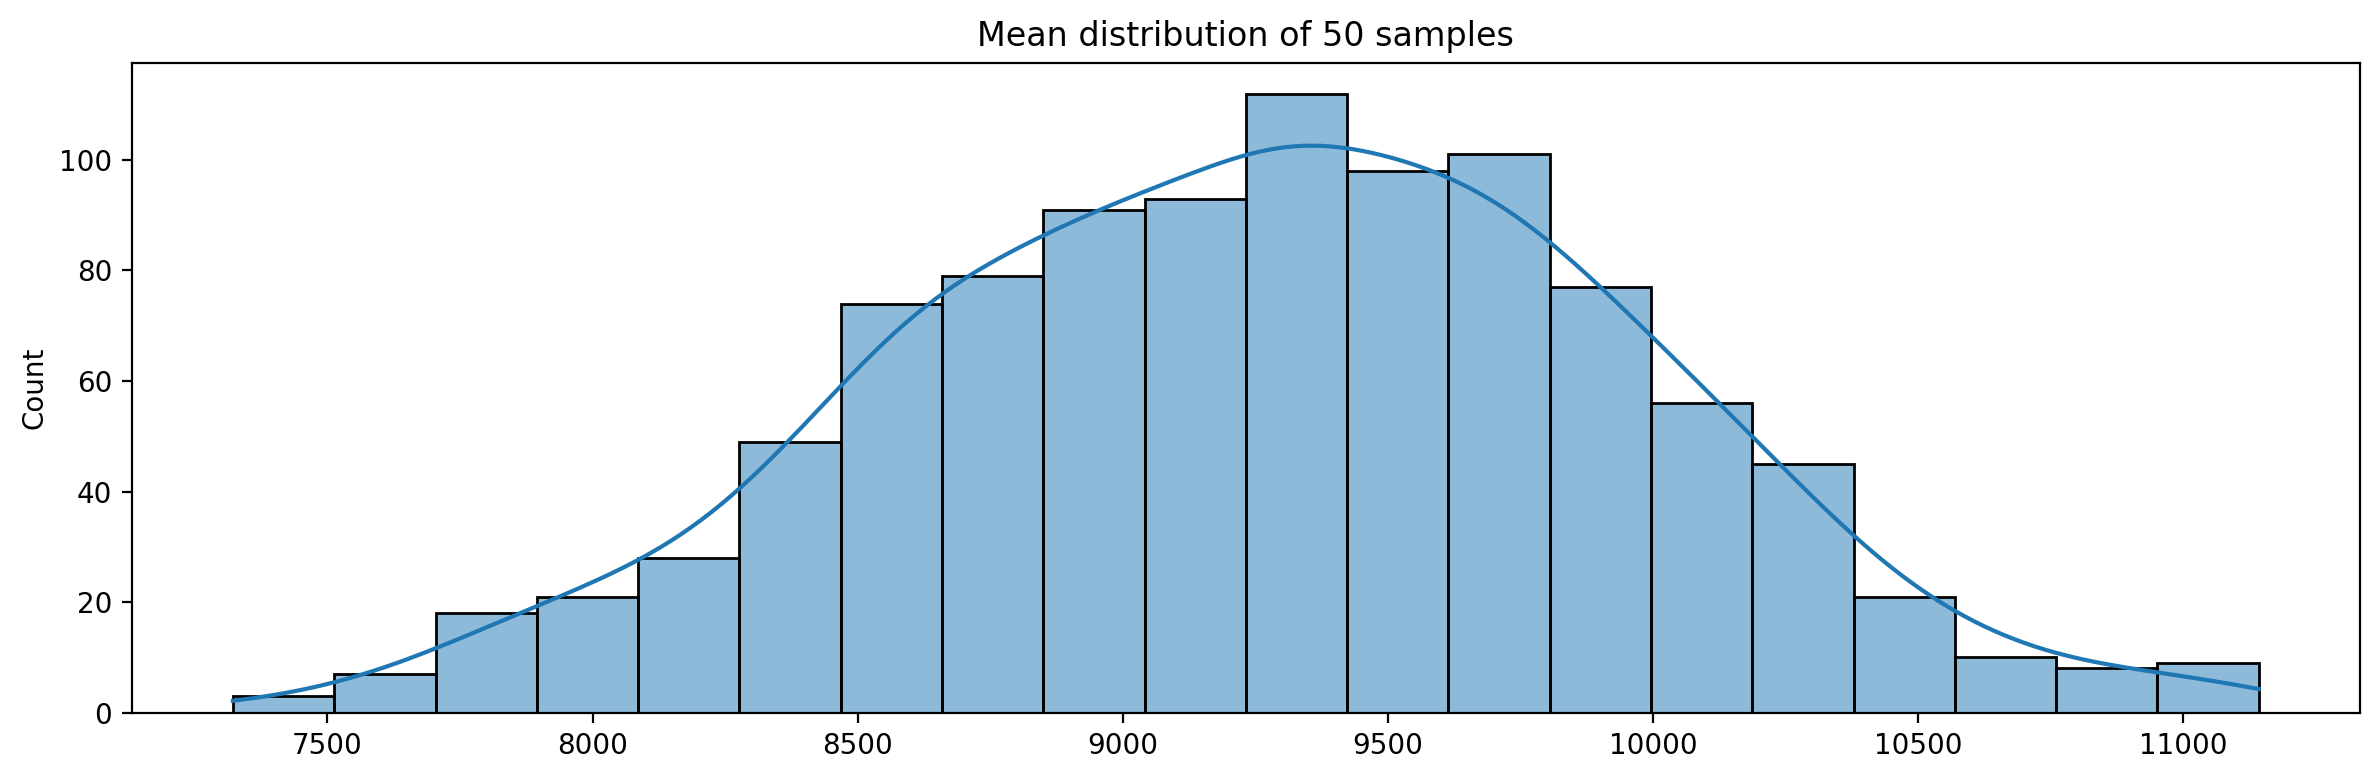

In [38]:
Sample_mean_50=[np.mean(walmart['Purchase'].sample(n=50)) for i in range(1000)]

# Setting up the canvas
fig,axs=plt.subplots(figsize=(12,4), dpi=200)

# Ploting commands
sns.histplot(data=Sample_mean_50, kde= True)

# Titles
axs.set_title('Mean distribution of 50 samples')

# Adjust subplot to avoid overlap
plt.tight_layout()

print(f"The population mean is: {np.round(walmart['Purchase'].mean(),2)}")
print(f"Mean of 50 samples:{np.mean(Sample_mean_50)}")
print(f"Standard deviation of 50 samples:{np.std(Sample_mean_50)}\n")

# Display plot
plt.show()

In our analysis, the initial observations from the graph indicate that the sample mean is approximately equal to the population mean, suggesting that our sample is effectively representative of the overall population in terms of the average purchase amount.

### Next Steps in Analysis:
we plan to increase the sample size and re-evaluate the mean. By enlarging the sample size, we aim to:
1. **Reduce Sampling Error**: Larger sample sizes typically yield more precise estimates of population parameters, reducing the variability inherent in smaller samples.
2. **Test Consistency**: Increasing the sample size allows us to test the consistency of our findings across different subsets of data, strengthening the reliability of our conclusions.
3. **Enhance Statistical Power**: A larger sample size will increase the statistical power of the analysis, improving our ability to detect true effects if they exist.

By analyzing the results with a larger sample, we can further scrutinize whether the sample means continue to closely approximate the population mean, thereby providing additional confidence in the representativeness and accuracy of our sampling approach. This step is crucial for affirming the validity of our conclusions derived from statistical sampling and the Central Limit Theorem.

In [1]:
def ci(sample,ci):
    mean=np.mean(sample)
    std=np.std(sample)
    z=norm.ppf((1-(ci/100))/2)
    lower=mean+(z*std)
    upper=mean-(z*std)
    return (lower,upper)

The population mean is: 9263.97
Mean of 500 samples:9273.127668
Standard deviation of 500 samples:227.26495164441388
With 95% confidence, we can say that the mean of the population lies in between (8827.696547828711, 9718.558788171287)



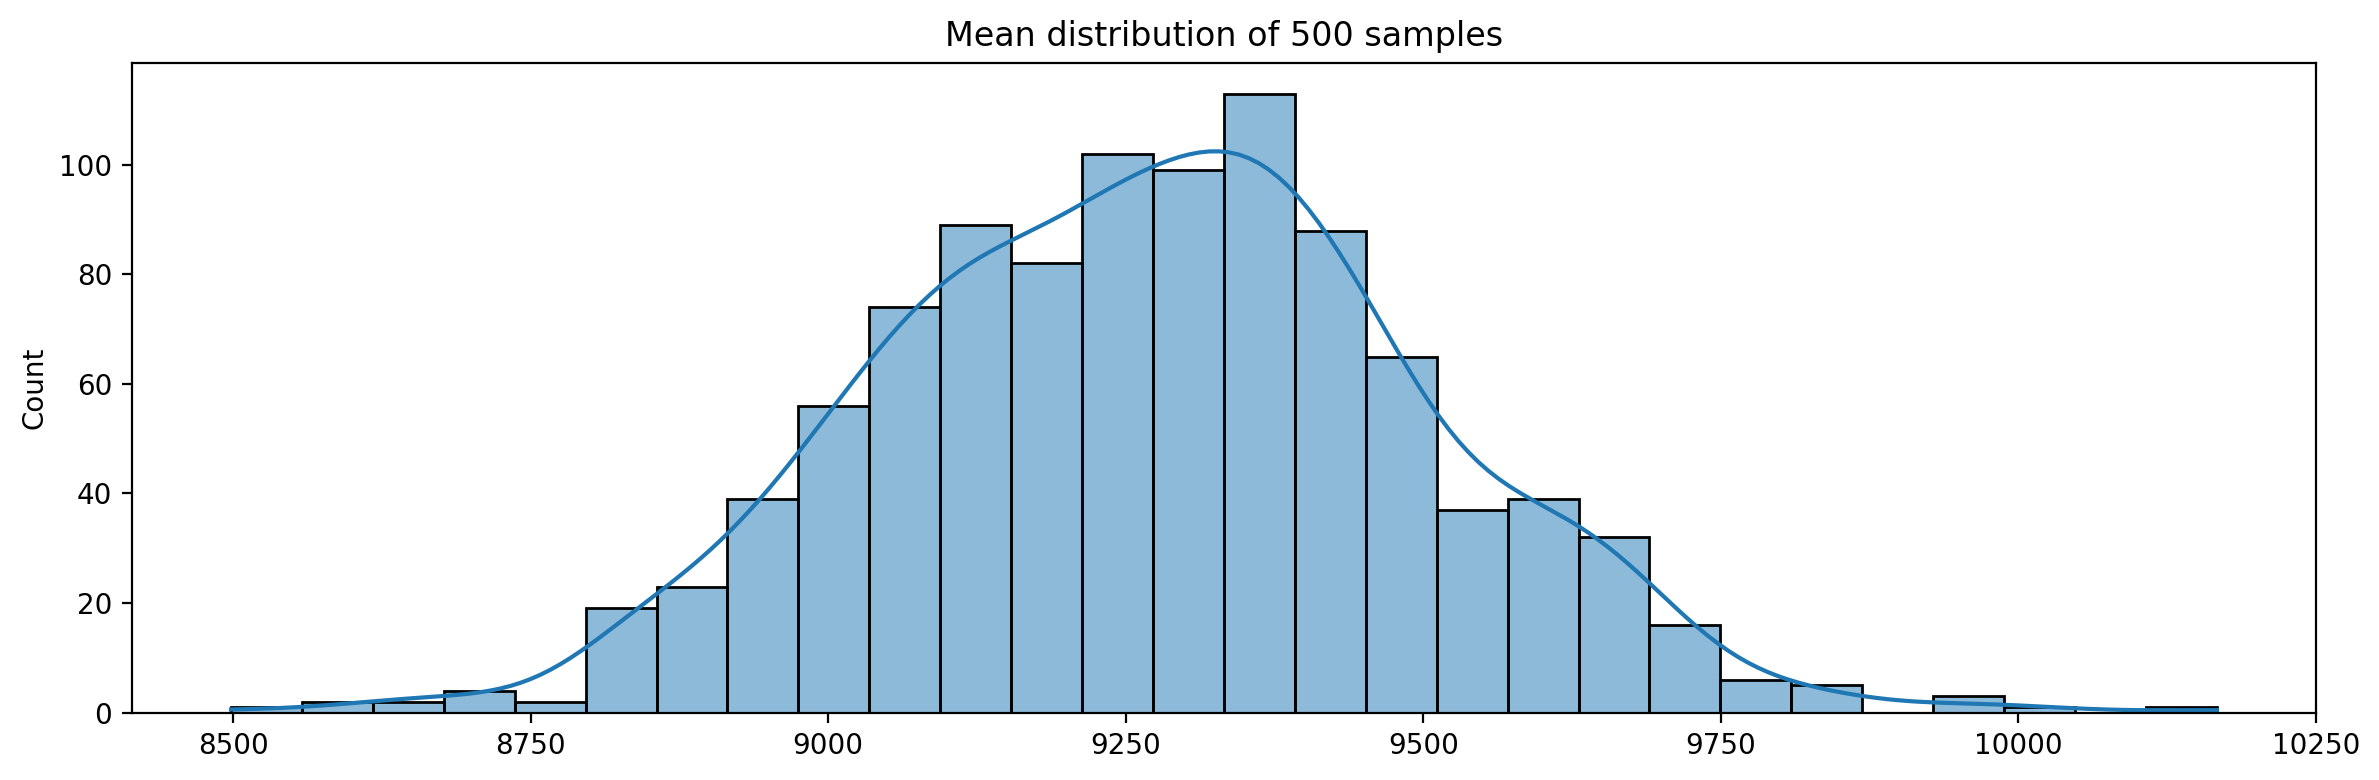

In [41]:
Sample_mean_500=[np.mean(walmart['Purchase'].sample(n=500)) for i in range(1000)]

# Setting up the canvas
fig,axs=plt.subplots(figsize=(12,4), dpi=200)

# Ploting commands
sns.histplot(data=Sample_mean_500, kde= True)

# Titles
axs.set_title('Mean distribution of 500 samples')

# Adjust subplot to avoid overlap
plt.tight_layout()

print(f"The population mean is: {np.round(walmart['Purchase'].mean(),2)}")
print(f"Mean of 500 samples:{np.mean(Sample_mean_500)}")
print(f"Standard deviation of 500 samples:{np.std(Sample_mean_500)}")
print(f"With 95% confidence, we can say that the mean of the population lies in between {ci(sample=Sample_mean_500,ci=95)}\n")

# Display plot
plt.show()

The population mean is: 9263.97
Mean of 5000 samples:9261.0506668
Standard deviation of 5000 samples:71.71279956336231
With 95% confidence, we can say that the mean of the population lies in between (9120.49616242527, 9401.60517117473)



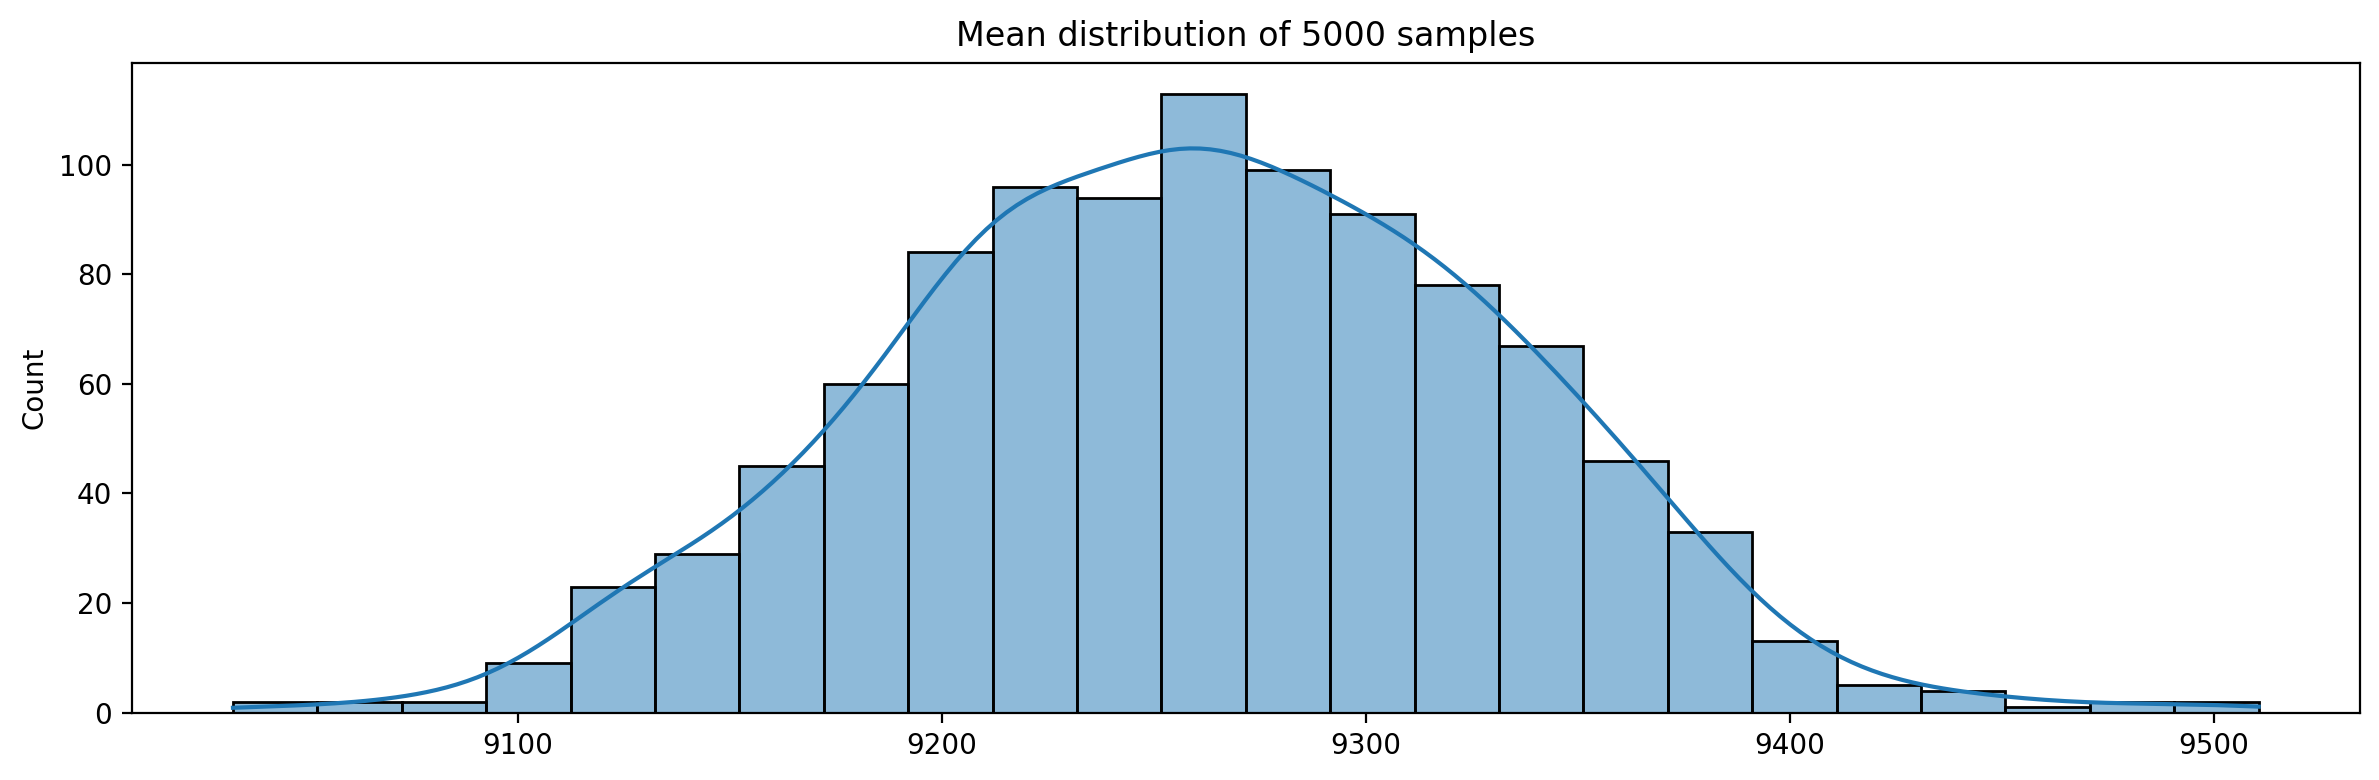

In [42]:
Sample_mean_5000=[np.mean(walmart['Purchase'].sample(n=5000)) for i in range(1000)]

# Setting up the canvas
fig,axs=plt.subplots(figsize=(12,4), dpi=200)

# Ploting commands
sns.histplot(data=Sample_mean_5000, kde= True)

# Titles
axs.set_title('Mean distribution of 5000 samples')

# Adjust subplot to avoid overlap
plt.tight_layout()

print(f"The population mean is: {np.round(walmart['Purchase'].mean(),2)}")
print(f"Mean of 5000 samples:{np.mean(Sample_mean_5000)}")
print(f"Standard deviation of 5000 samples:{np.std(Sample_mean_5000)}")
print(f"With 95% confidence, we can say that the mean of the population lies in between {ci(sample=Sample_mean_5000,ci=95)}\n")

# Display plot
plt.show()

The population mean is: 9263.97
Mean of 50000 samples:9263.6791952
Standard deviation of 50000 samples:20.828825799387033
With 95% confidence, we can say that the mean of the population lies in between (9222.855446792943, 9304.502943607058)



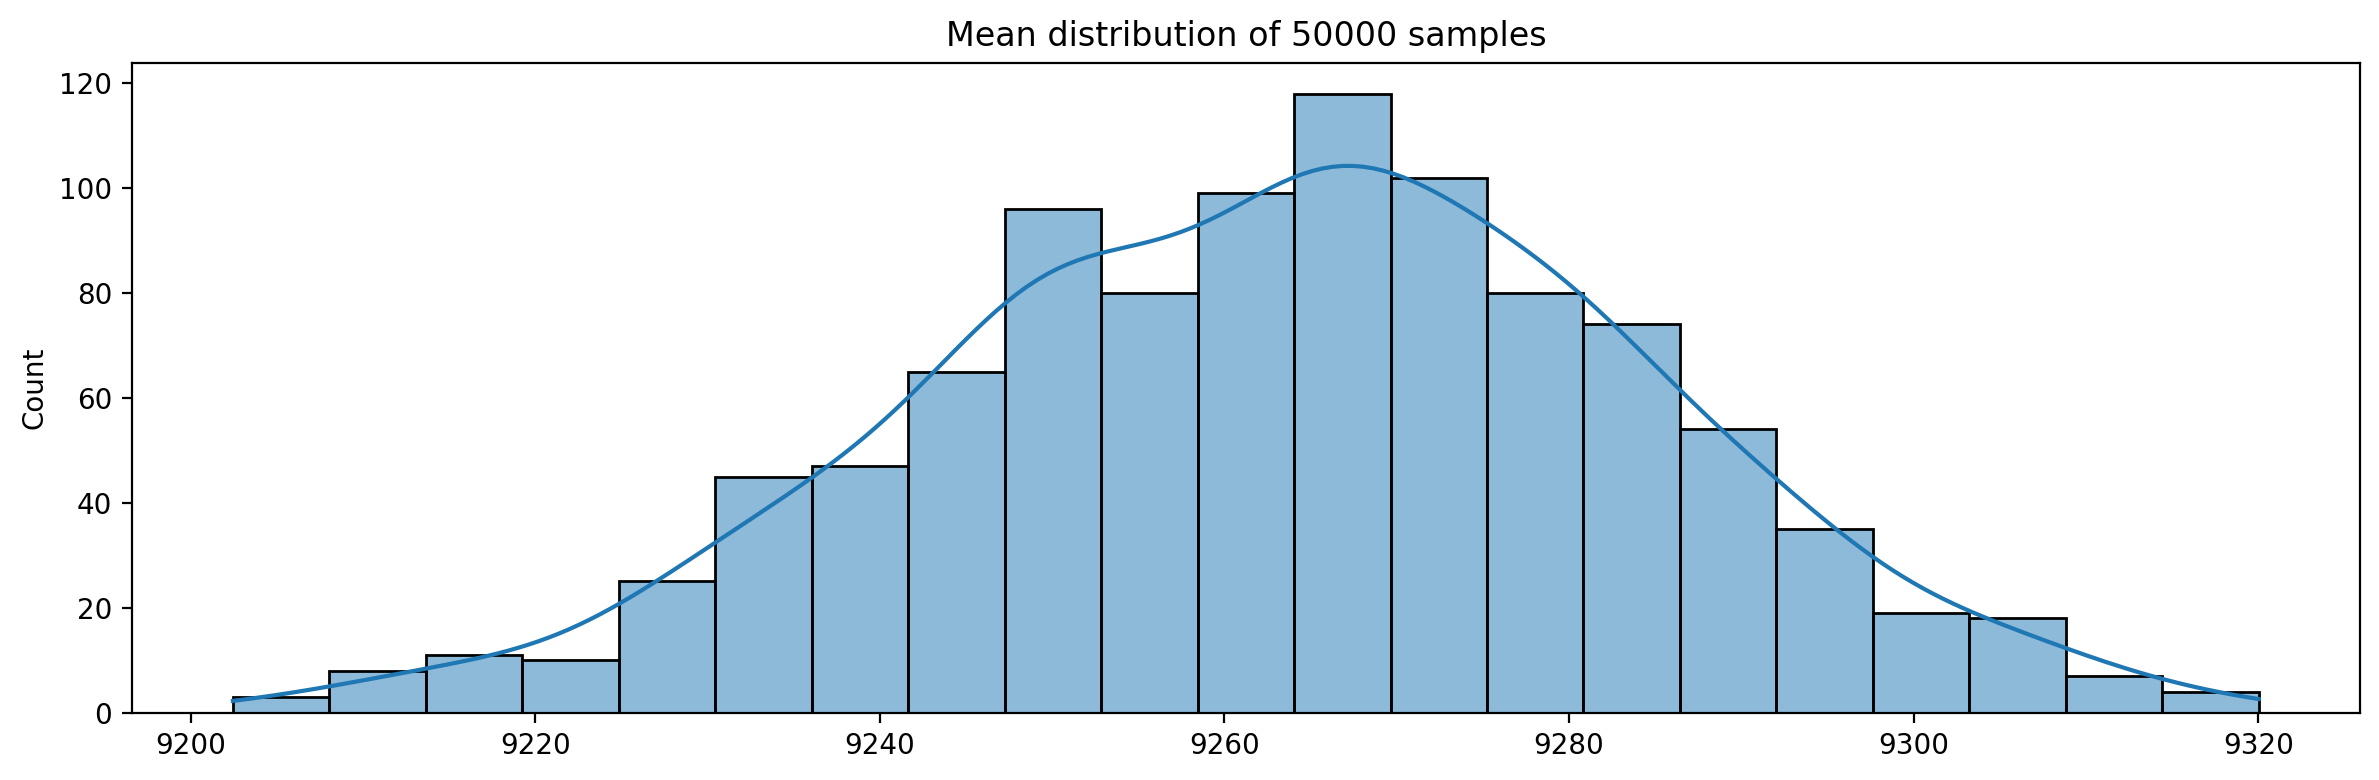

In [43]:
Sample_mean_50000=[np.mean(walmart['Purchase'].sample(n=50000)) for i in range(1000)]

# Setting up the canvas
fig,axs=plt.subplots(figsize=(12,4), dpi=200)

# Ploting commands
sns.histplot(data=Sample_mean_50000, kde= True)

# Titles
axs.set_title('Mean distribution of 50000 samples')

# Adjust subplot to avoid overlap
plt.tight_layout()

print(f"The population mean is: {np.round(walmart['Purchase'].mean(),2)}")
print(f"Mean of 50000 samples:{np.mean(Sample_mean_50000)}")
print(f"Standard deviation of 50000 samples:{np.std(Sample_mean_50000)}")
print(f"With 95% confidence, we can say that the mean of the population lies in between {ci(sample=Sample_mean_50000,ci=95)}\n")

# Display plot
plt.show()

In [45]:
def sample_distribution(data,comment=''):
    size=min(len(data)-100,50000)
    Sample_mean=[np.mean(data.sample(n=size)) for i in range(1000)]

    # Setting up the canvas
    fig,axs=plt.subplots(figsize=(12,4), dpi=200)

    # Ploting commands
    sns.histplot(data=Sample_mean, kde= True)

    # Titles
    axs.set_title('Mean distribution of 50000 samples')

    # Adjust subplot to avoid overlap
    plt.tight_layout()

    if comment == '':
        print(f"The population mean is: {np.round(data.mean(),2)}")
        print(f"Mean of {size} samples:{np.mean(Sample_mean)}")
        print(f"Standard deviation of {size} samples:{np.std(Sample_mean)}")
        print(f"With 95% confidence, we can say that the mean of the population lies in between {ci(sample=Sample_mean,ci=95)}\n")
    else:
        print(f"The {comment} population mean is: {np.round(data.mean(),2)}")
        print(f"Mean of {size} {comment} samples:{np.mean(Sample_mean)}")
        print(f"Standard deviation of {size} {comment} samples:{np.std(Sample_mean)}")
        print(f"With 95% confidence, we can say that the mean of the {comment} population lies in between {ci(sample=Sample_mean,ci=95)}\n")

    # Display plot
    plt.show()

## Gender Differences in Spending Patterns During Black Friday at Walmart

The Male population mean is: 9437.53
Mean of 50000 Male samples:9437.5753176
Standard deviation of 50000 Male samples:21.33004886901034
With 95% confidence, we can say that the mean of the Male population lies in between (9395.76919002826, 9479.381445171739)



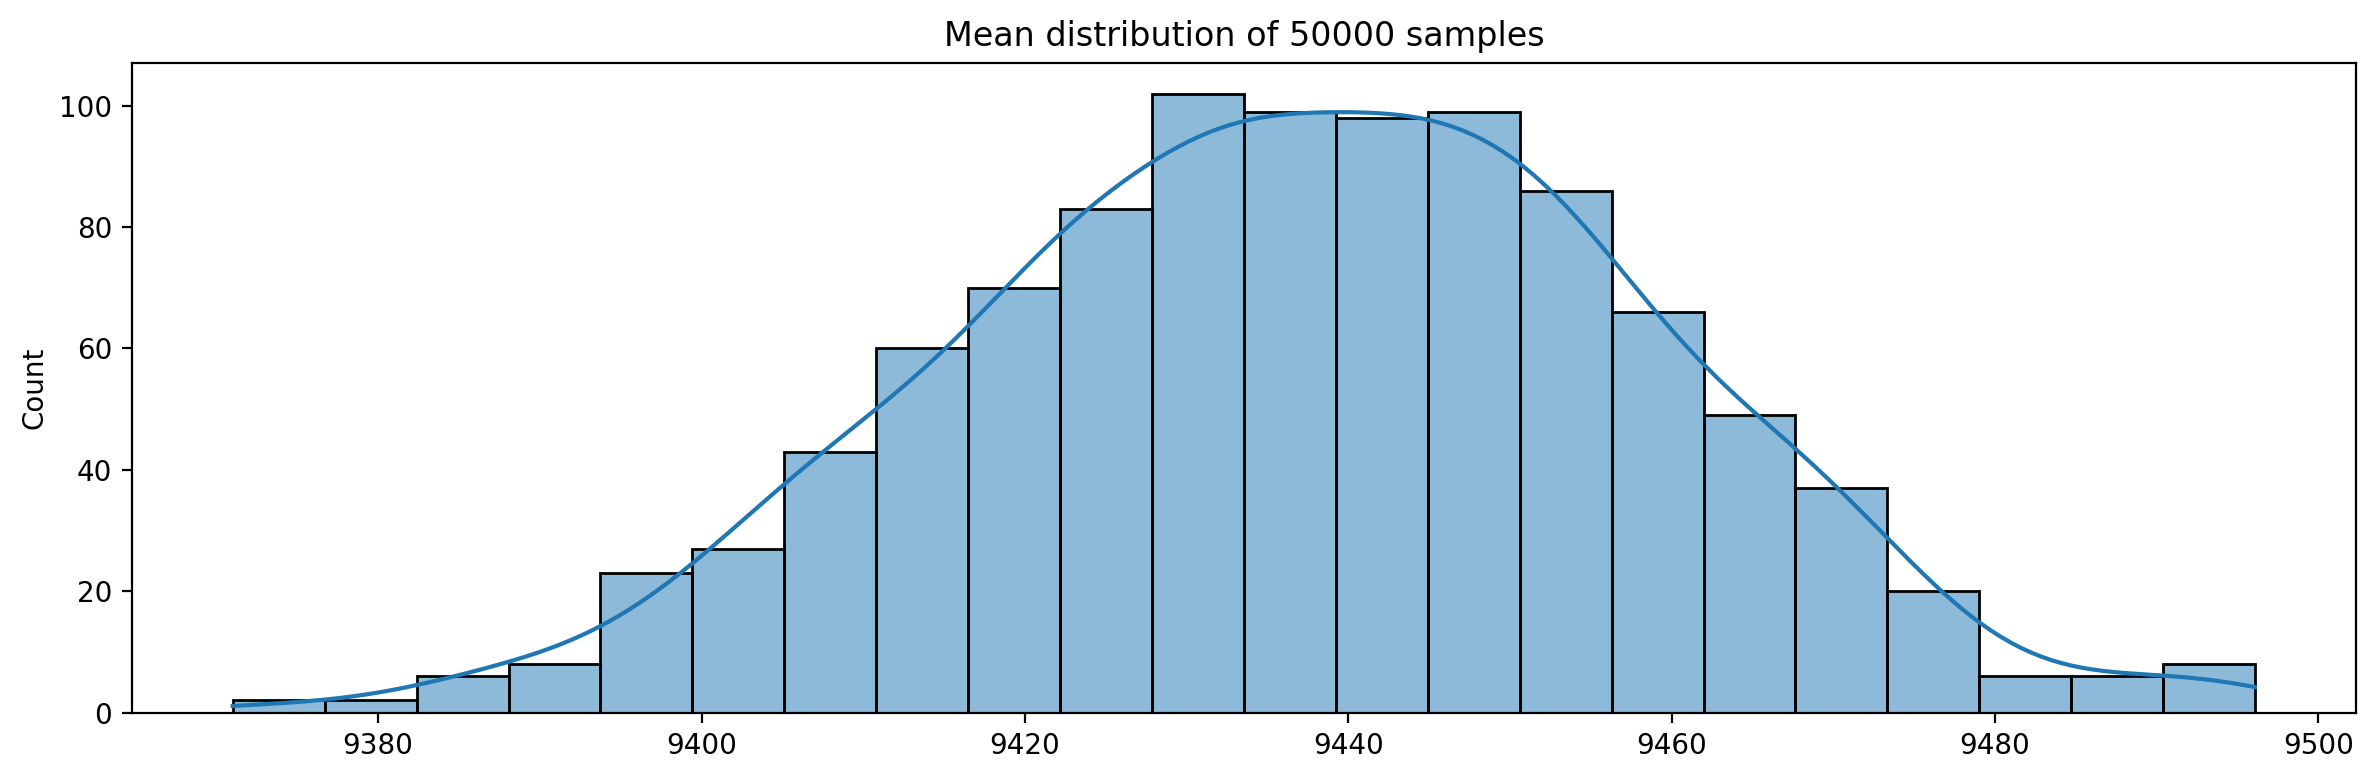

In [46]:
sample_distribution(data=walmart.loc[walmart['Gender'] == 'M','Purchase'],comment='Male')

The Female population mean is: 8734.57
Mean of 50000 Female samples:8734.31100948
Standard deviation of 50000 Female samples:17.413797682372813
With 95% confidence, we can say that the mean of the Female population lies in between (8700.180593188481, 8768.441425771518)



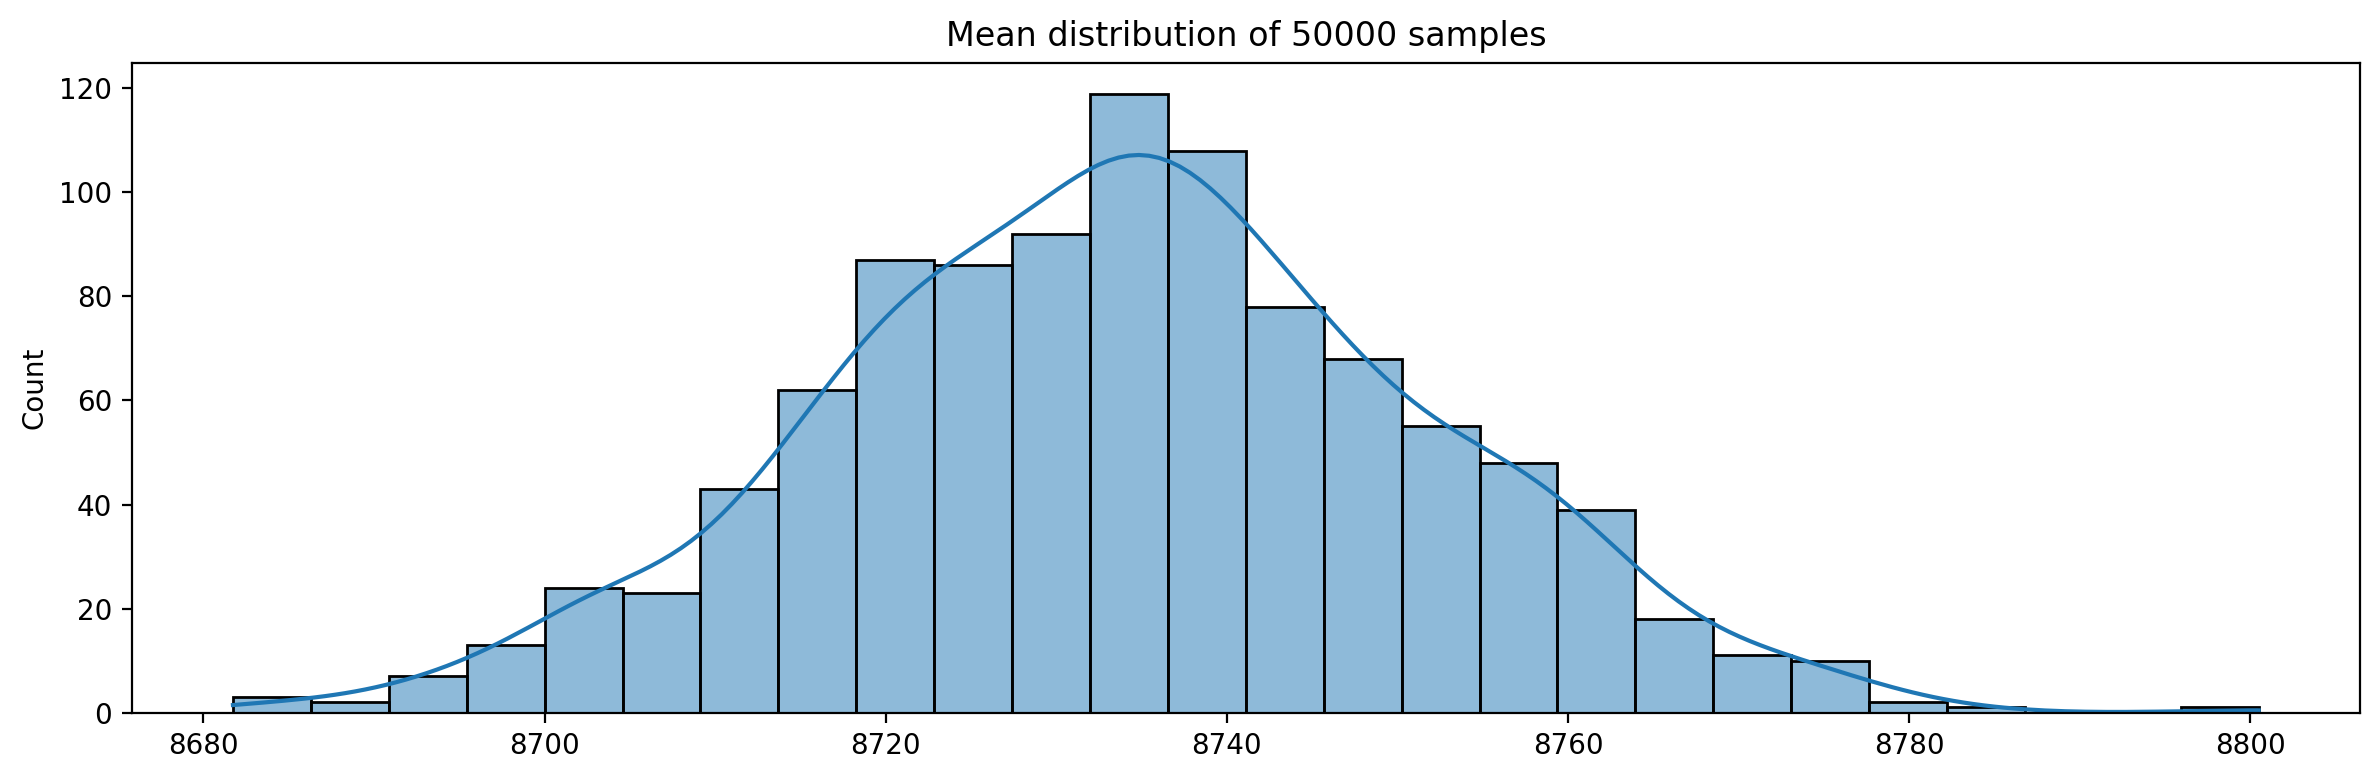

In [47]:
sample_distribution(data=walmart.loc[walmart['Gender'] == 'F','Purchase'],comment='Female')

Based on the analysis conducted, it can be concluded that male customers tend to spend more than female customers on Black Friday at Walmart. Specifically, the average purchase amount for males is significantly higher than the average purchase amount for females. This conclusion is robust, supported by the analysis of 50,000 samples for each gender, and is further strengthened by narrow confidence intervals. These intervals confirm the high accuracy of the mean spending estimates.

This finding suggests that male customers are a more lucrative target for Black Friday promotions at Walmart. The company could leverage this insight by developing marketing strategies and sales promotions that specifically appeal to male shoppers, potentially enhancing sales performance during this critical shopping period.

## Marital Status and Spending Behavior During Black Friday at Walmart

The Unmarried population mean is: 9265.91
Mean of 50000 Unmarried samples:9266.126361820001
Standard deviation of 50000 Unmarried samples:20.443691200926654
With 95% confidence, we can say that the mean of the Unmarried population lies in between (9226.057463355126, 9306.195260284876)



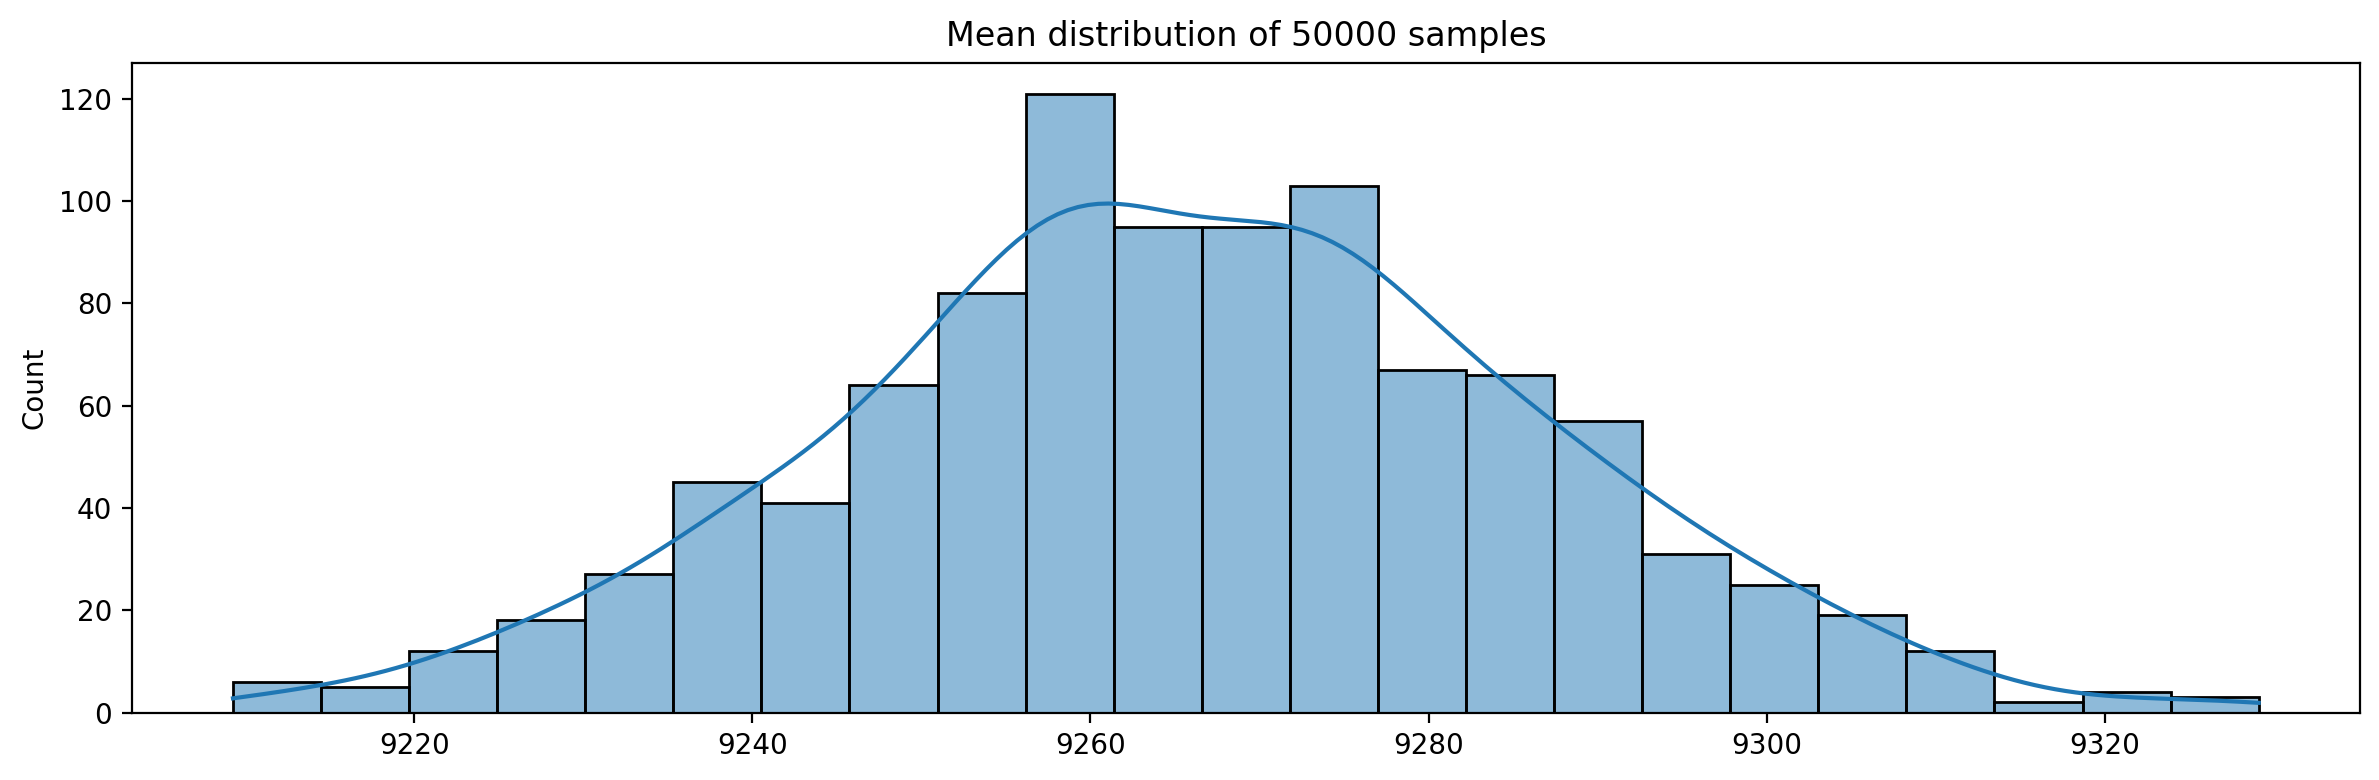

In [48]:
sample_distribution(data=walmart.loc[walmart['Marital_Status']==0,'Purchase'], comment='Unmarried')

The Married population mean is: 9261.17
Mean of 50000 Married samples:9262.0847454
Standard deviation of 50000 Married samples:20.334850860218623
With 95% confidence, we can say that the mean of the Married population lies in between (9222.229170082977, 9301.940320717022)



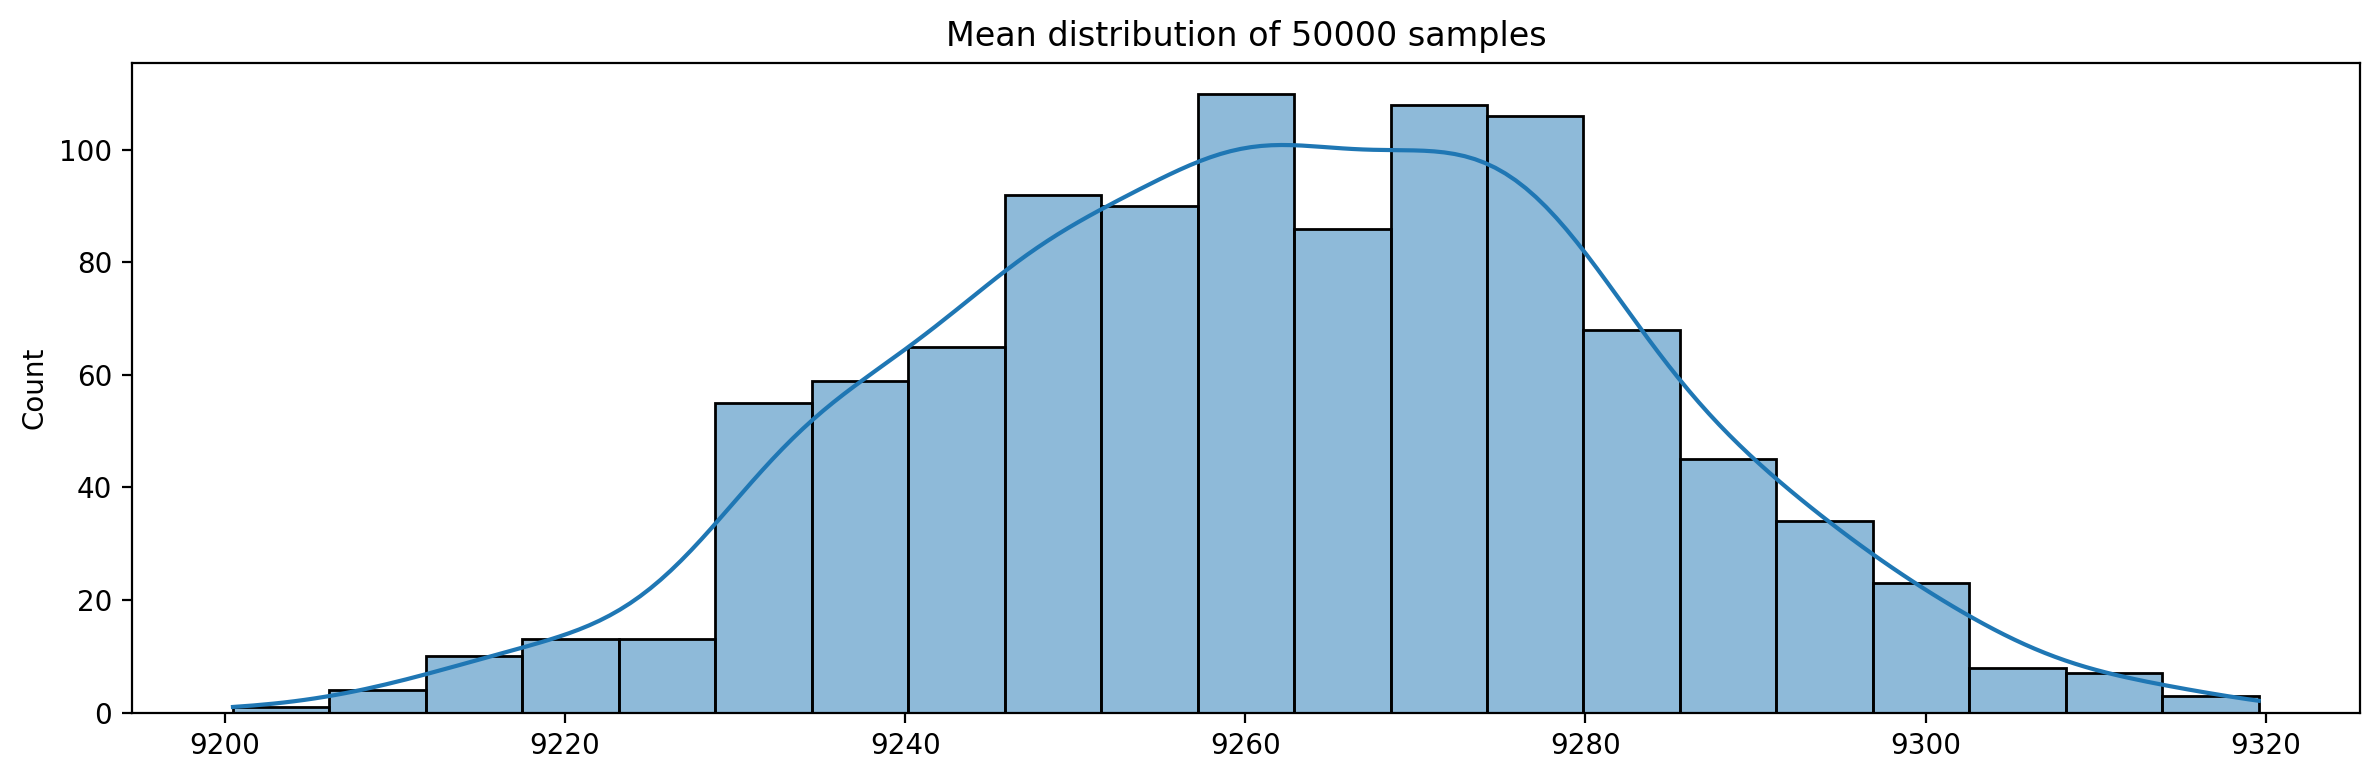

In [49]:
sample_distribution(data=walmart.loc[walmart['Marital_Status']==1,'Purchase'], comment='Married')

This analysis examines the spending patterns during Black Friday at Walmart, differentiated by marital status. Statistical data reveals that the mean purchase amount for unmarried customers is slightly higher compared tomarried customers. The mean of 50,000 samples for unmarried and married customers, closely mirroring the population means.

Furthermore, confidence intervals calculated for both groups with 95% confidence show that, the overlap in confidence intervals suggests that, despite minimal differences, the spending behaviors between unmarried and married customers are remarkably similar during Black Friday sales at Walmart.

## Age group and Spending Behavior During Black Friday at Walmart

The 0-17 population mean is: 8933.46
Mean of 15002 0-17 samples:8933.384547127049
Standard deviation of 15002 0-17 samples:3.320211874071286
With 95% confidence, we can say that the mean of the 0-17 population lies in between (8926.877051432826, 8939.892042821271)



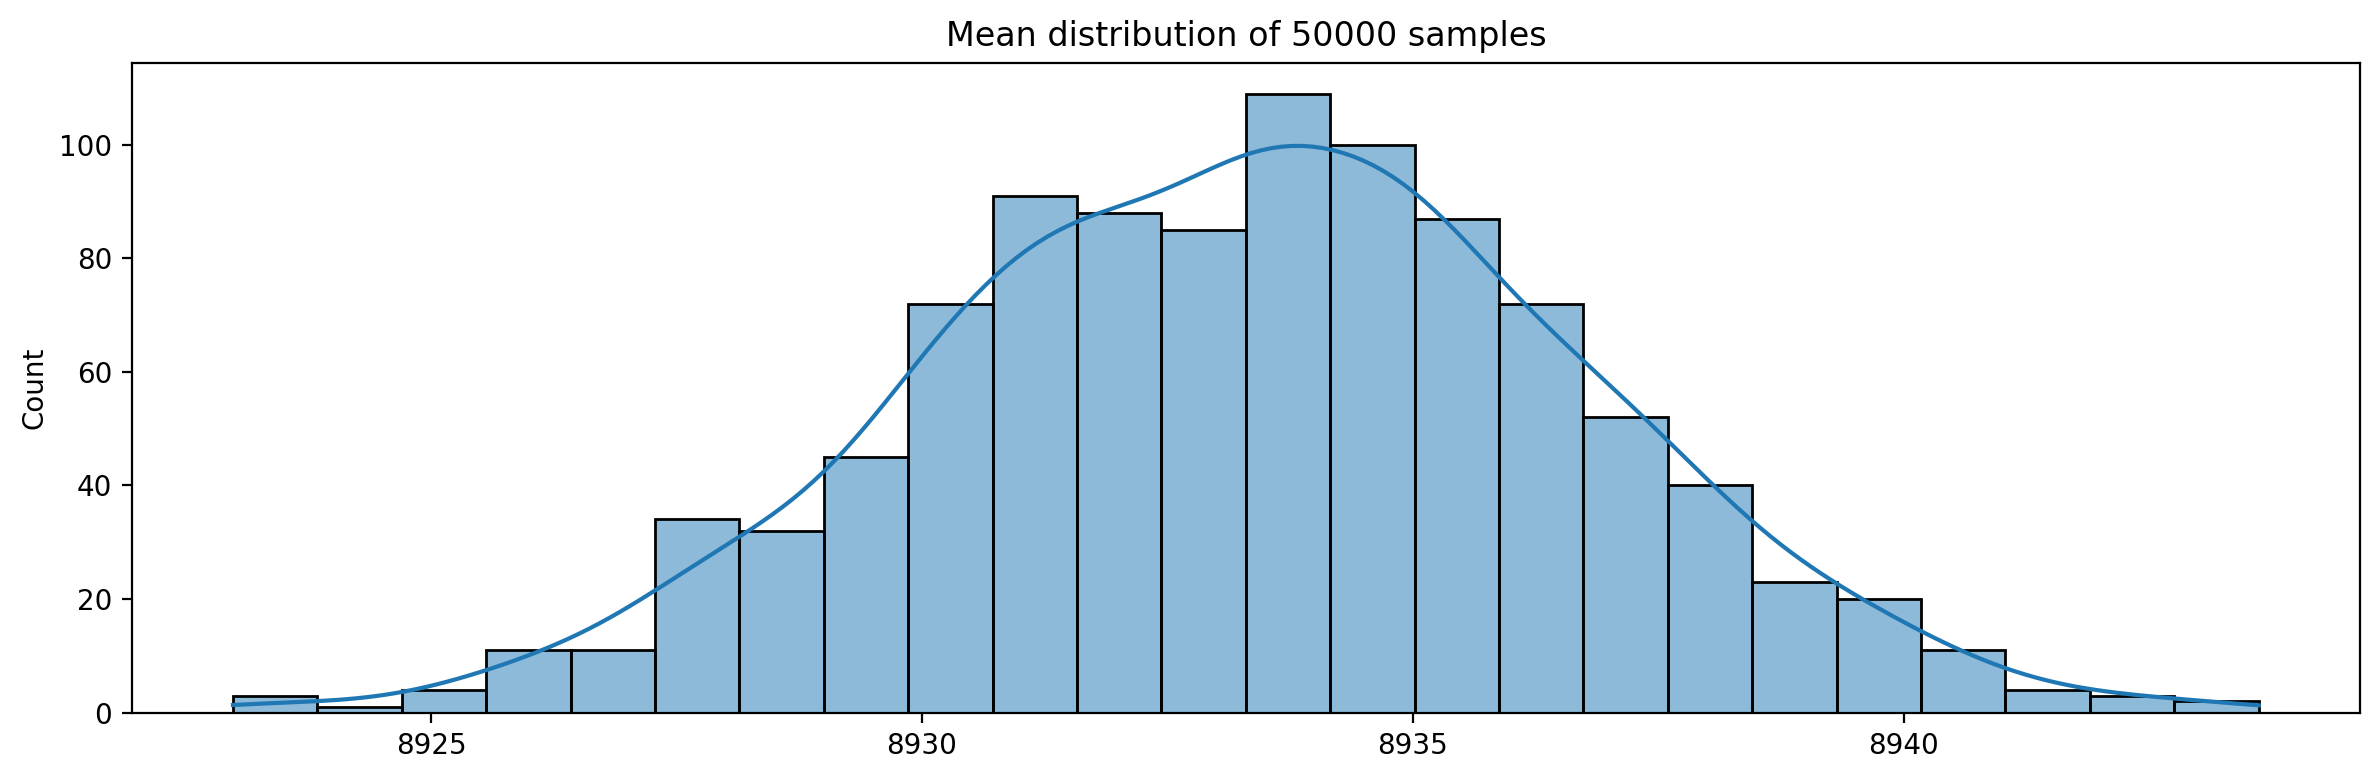

The 55+ population mean is: 9336.28
Mean of 21404 55+ samples:9336.181141655765
Standard deviation of 21404 55+ samples:2.3527281724946056
With 95% confidence, we can say that the mean of the 55+ population lies in between (9331.569879172263, 9340.792404139267)



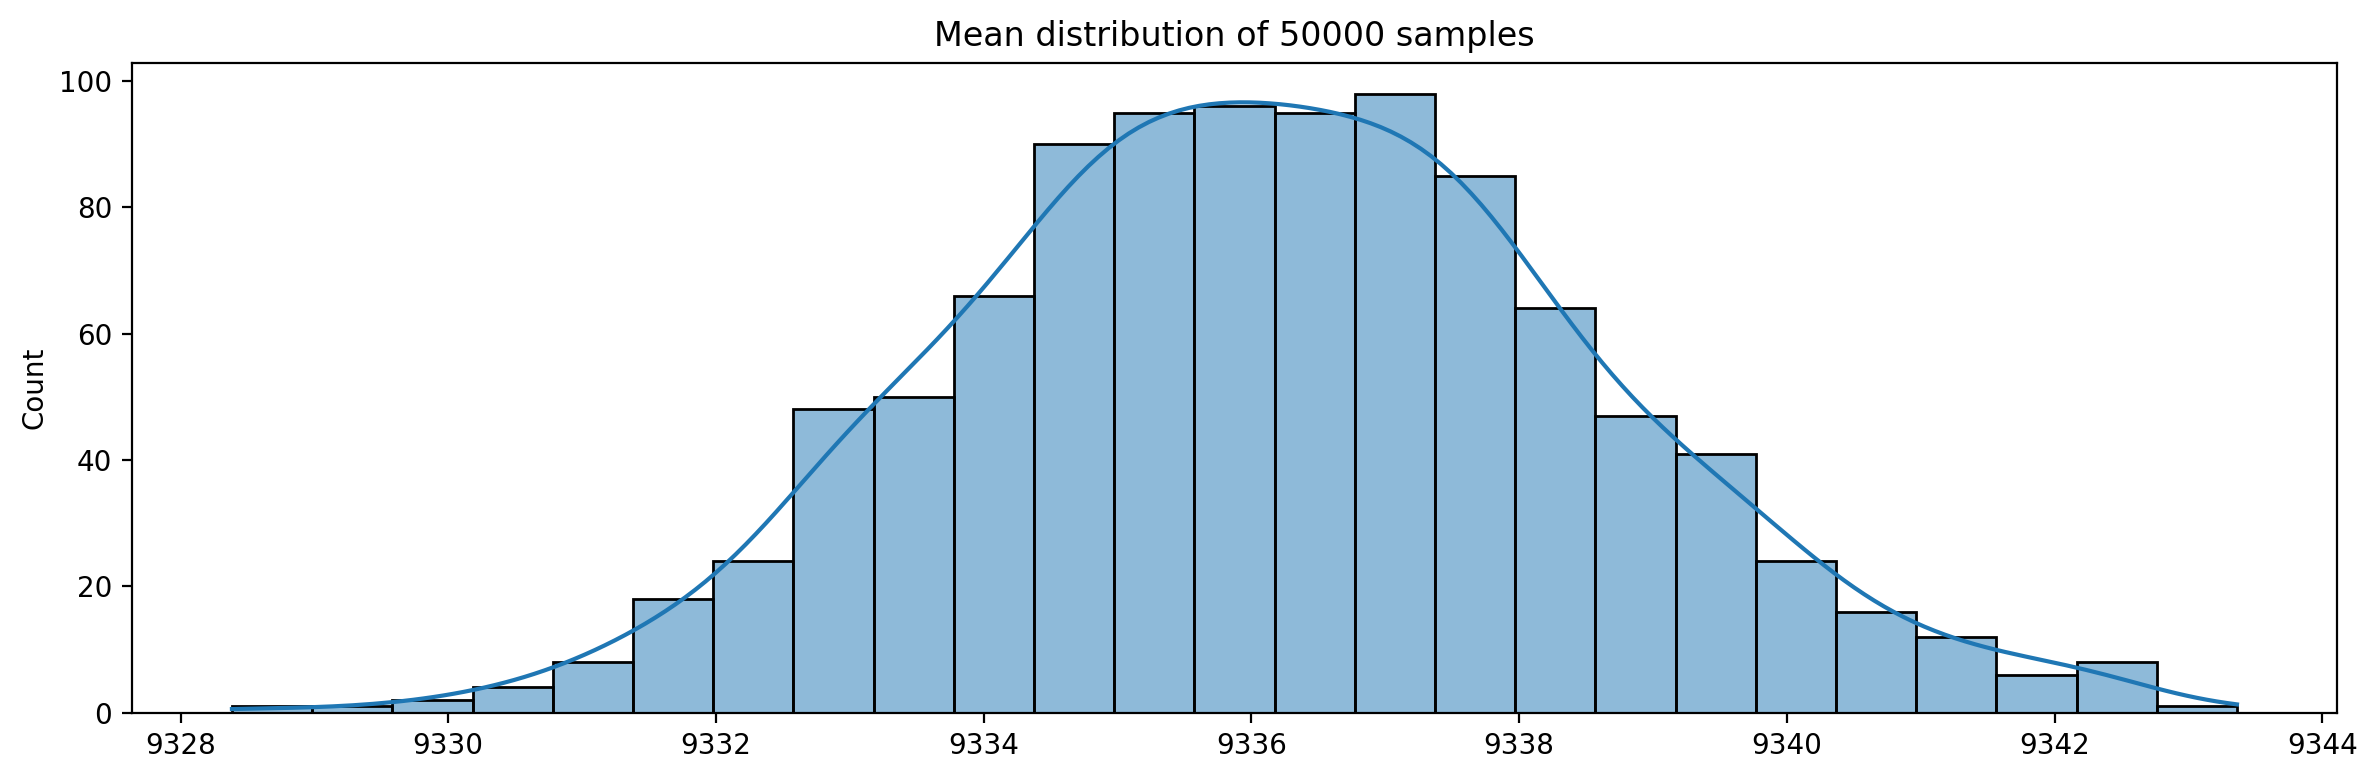

The 26-35 population mean is: 9252.69
Mean of 50000 26-35 samples:9253.261616099999
Standard deviation of 50000 26-35 samples:19.848296611875437
With 95% confidence, we can say that the mean of the 26-35 population lies in between (9214.359669586254, 9292.163562613743)



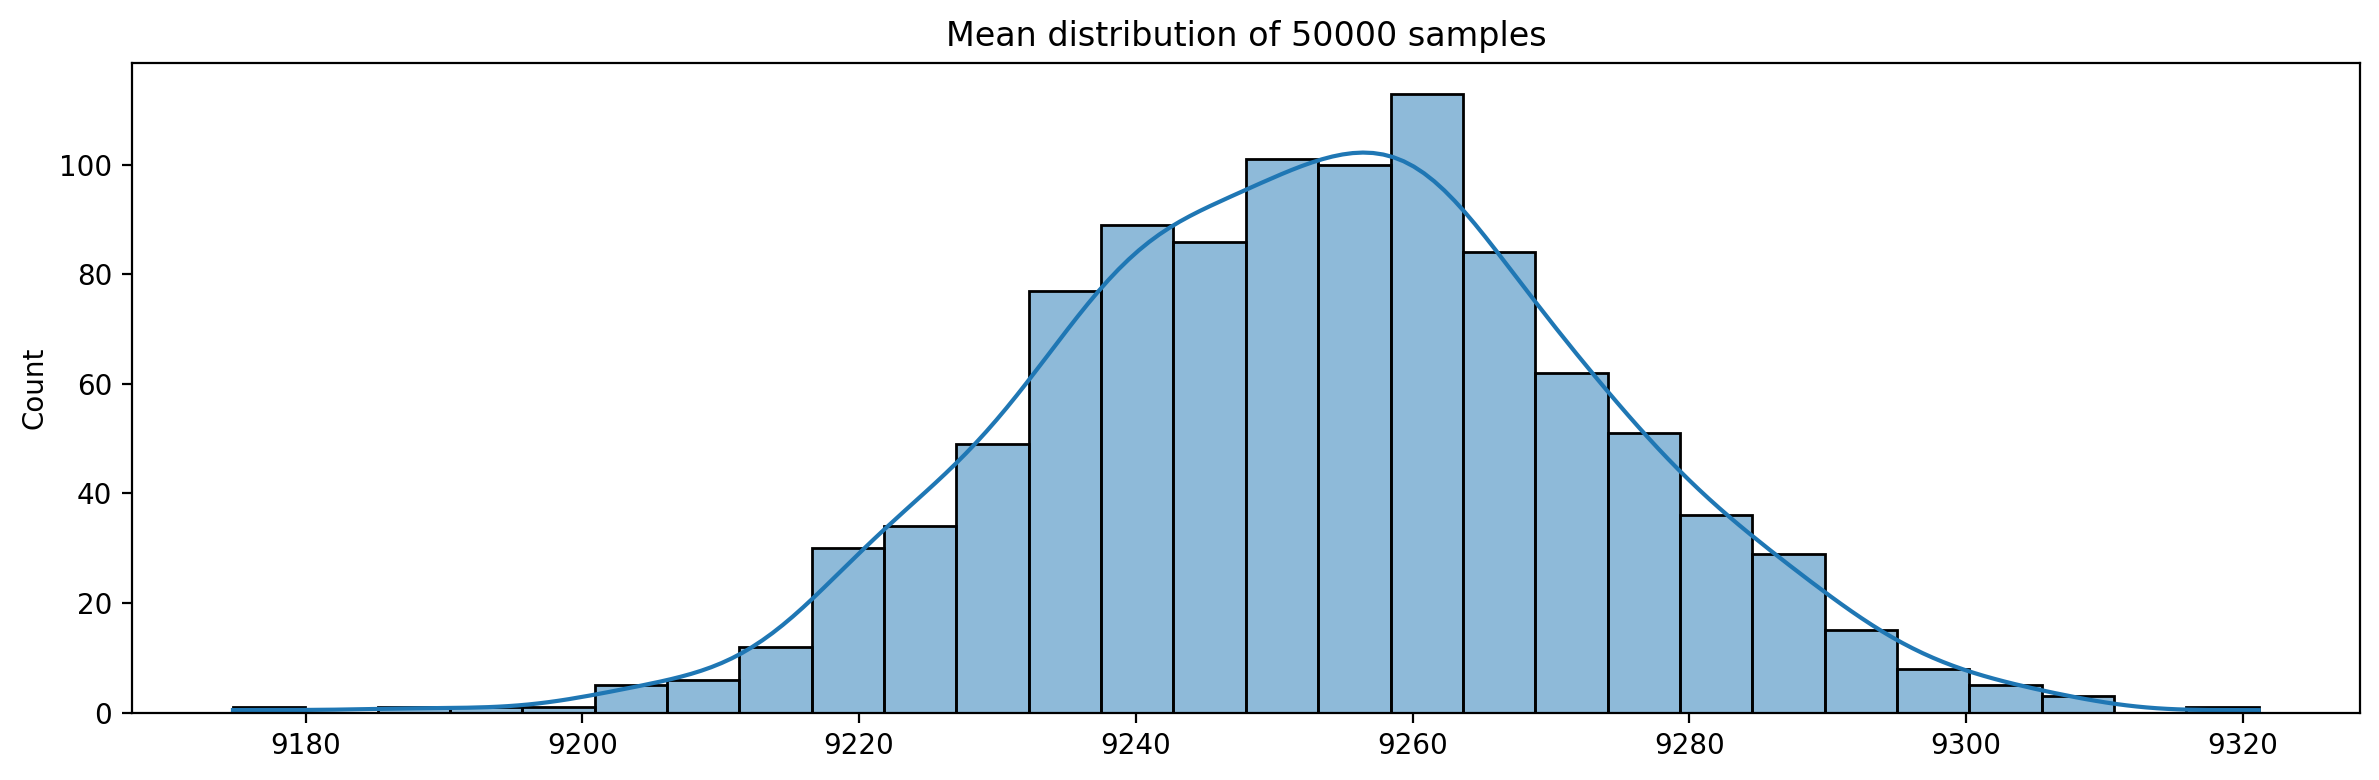

The 46-50 population mean is: 9208.63
Mean of 45601 46-50 samples:9208.608490822571
Standard deviation of 45601 46-50 samples:1.085049578983183
With 95% confidence, we can say that the mean of the 46-50 population lies in between (9206.481832726324, 9210.735148918819)



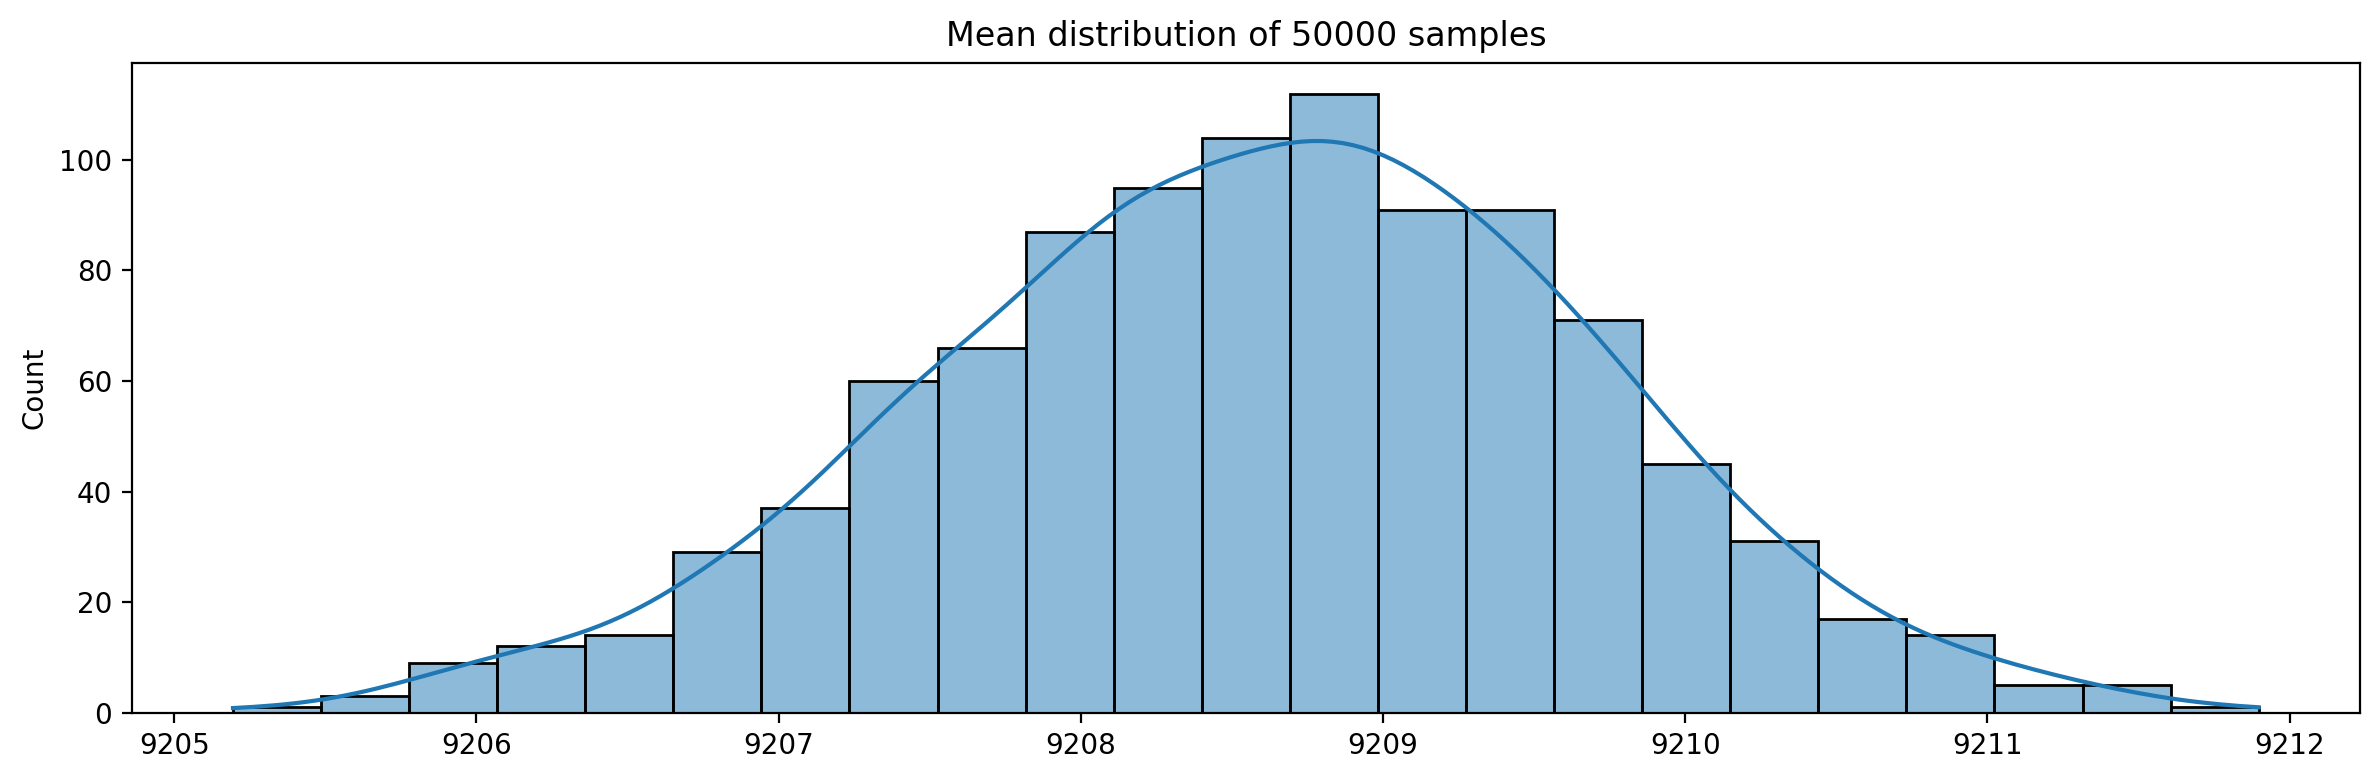

The 51-55 population mean is: 9534.81
Mean of 38401 51-55 samples:9534.745003801985
Standard deviation of 38401 51-55 samples:1.2577087580896615
With 95% confidence, we can say that the mean of the 51-55 population lies in between (9532.279939933089, 9537.210067670881)



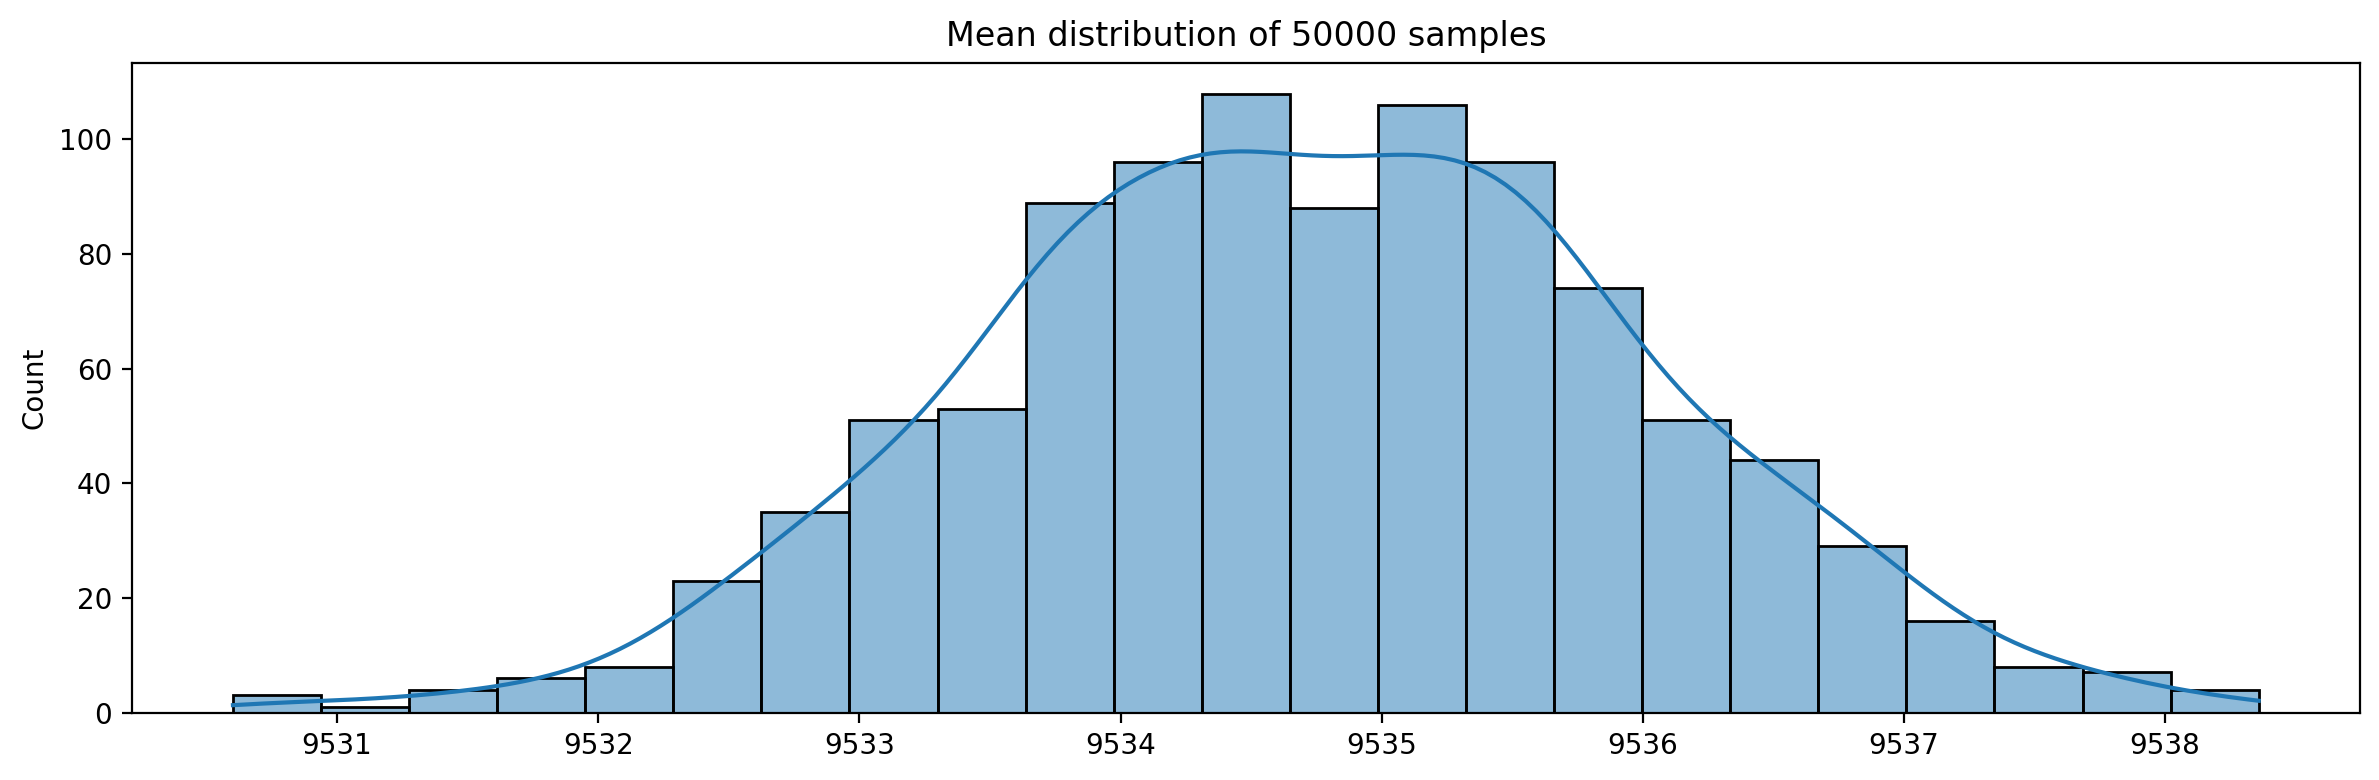

The 36-45 population mean is: 9331.35
Mean of 50000 36-45 samples:9331.27256696
Standard deviation of 50000 36-45 samples:17.037829593796186
With 95% confidence, we can say that the mean of the 36-45 population lies in between (9297.879034581429, 9364.666099338572)



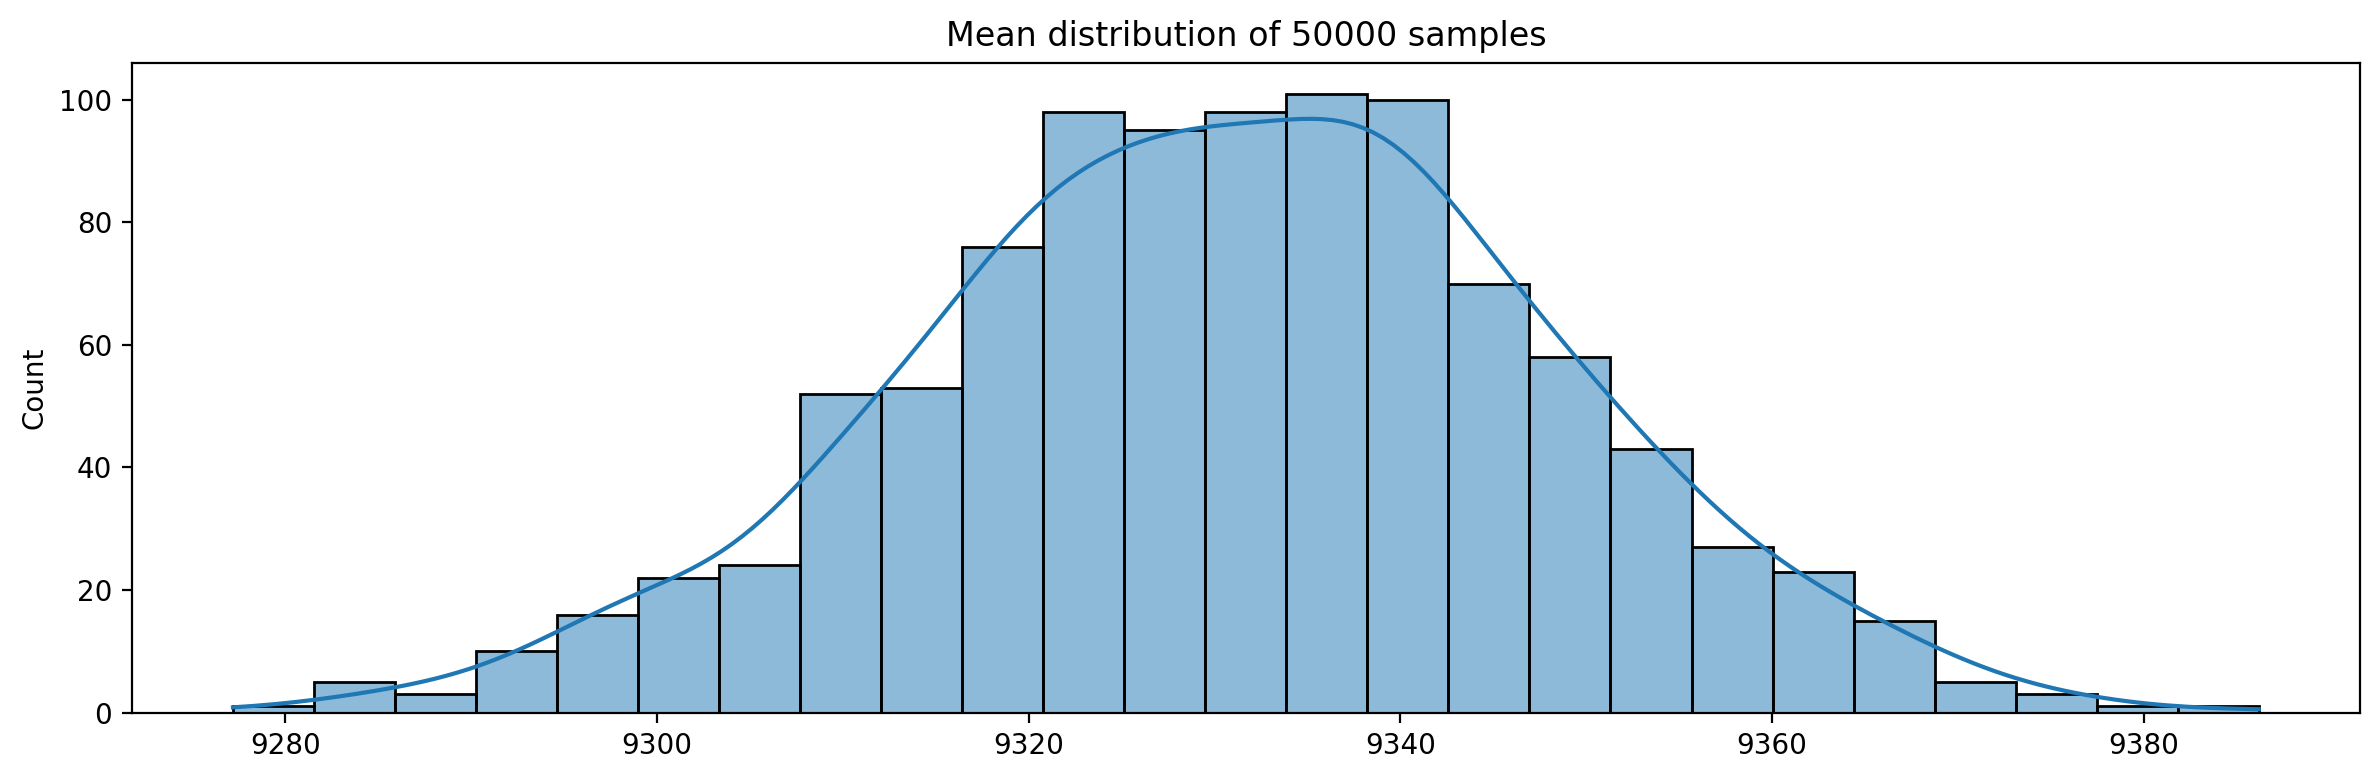

The 18-25 population mean is: 9169.66
Mean of 50000 18-25 samples:9169.74525888
Standard deviation of 50000 18-25 samples:16.424547808092328
With 95% confidence, we can say that the mean of the 18-25 population lies in between (9137.553736713784, 9201.936781046217)



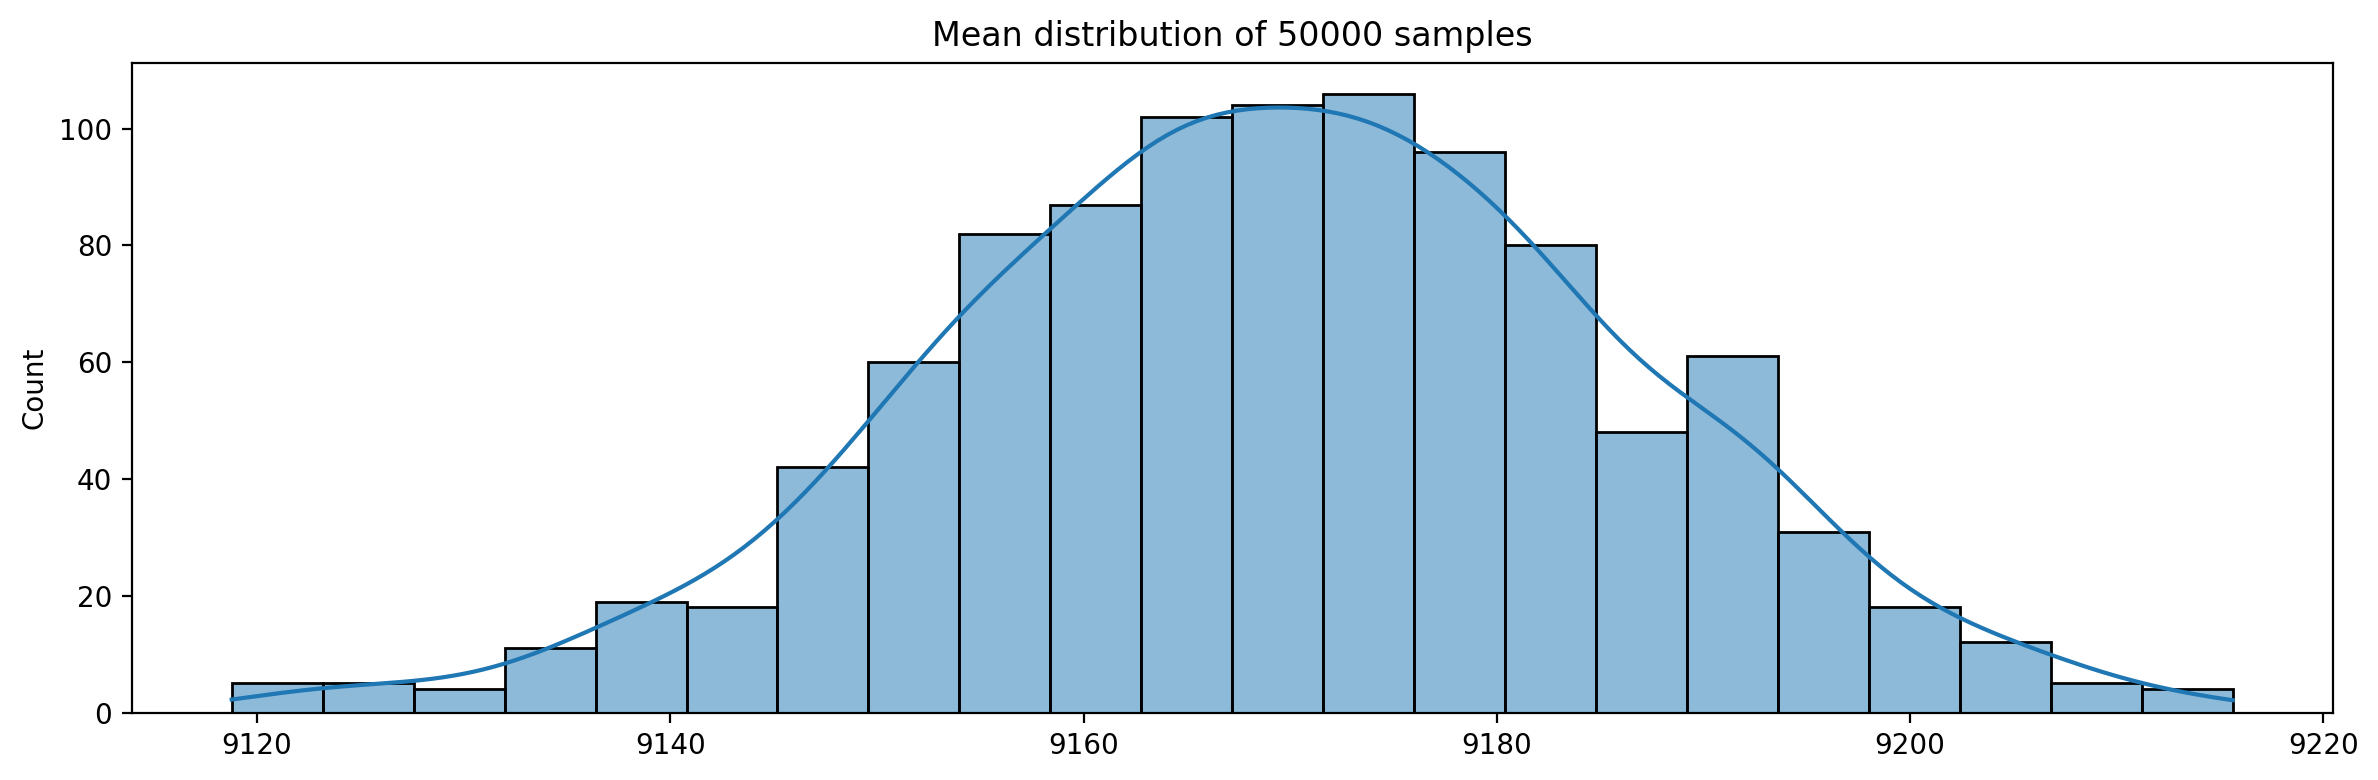

In [50]:
for i in walmart['Age'].unique().tolist():
    sample_distribution(data=walmart.loc[walmart['Age']==i,'Purchase'], comment=i)

The analysis involves calculating the sample means and standard deviations for purchases made by customers in the following age groups: 0-17, 18-25, 26-35, 36-45, 46-50, 51-55, and 55+. Confidence intervals were also constructed for each age group to estimate the population mean spending with 95% confidence.

Key findings suggest that the age groups 51-55 and 55+ tend to spend more compared to other age brackets, highlighting a potentially higher purchasing power or different purchasing preferences among older shoppers. On the other hand, the younger age groups, especially those between 0-17 and 18-25, generally spend less, which might reflect their limited financial resources or different priorities.

**Insights:**

1. **Gender Distribution:**
   - Males significantly outnumber females among Walmart customers. This disparity may influence product offerings and marketing strategies.

2. **Age Distribution:**
   - The 26-35 age group is the most prevalent, suggesting marketing and product offerings should focus on this demographic's preferences and needs.

3. **City Category Distribution:**
   - Customers from City Category C are predominant, indicating a stronger presence or appeal in these areas.

4. **Residence Duration:**
   - A significant number of customers have lived in their current city for only 1 year, pointing to high mobility or an influx of new residents who are potential customers.

5. **Marital Status Distribution:**
   - Single customers outnumber married customers, potentially affecting the types of products that should be prioritized.

6. **Occupation Distribution:**
   - Occupations 4 and 0 are the most common among customers, while Occupation 8 is underrepresented.

7. **Product Categories and Purchasing Behavior:**
   - Categories 8 and 5 have a large number of unique products, indicating broad appeal. However, high-value transactions are notably prevalent in categories 10 and 15.

8. **Customer Purchase Patterns:**
   - The bulk of individual purchases lies between $5,000 and $10,000, suggesting that most transactions are moderately priced items.
   - High spenders, though fewer, contribute significantly to overall sales.

9. **High-Value Transactions:**
   - Categories 10 and 15 include premium items or bulk purchases that significantly drive up transaction values.

10. **Customer Engagement and Loyalty:**
    - Certain users have extremely high transaction counts or spending, pointing to the potential benefits of targeted loyalty programs or personalized marketing.

**Recommendations:**

1. **Gender-Specific Marketing:**
   - Develop targeted marketing campaigns that cater more specifically to males given their predominance, while also exploring strategies to increase female engagement and balance the customer base.

2. **Age-Focused Product Offerings:**
   - Tailor product ranges and marketing campaigns to appeal to the 26-35 age group, while considering ways to attract the underrepresented younger and older age groups.

3. **Geographic Strategy:**
   - Strengthen presence and tailor marketing in City Category C where Walmart has a strong customer base. Explore opportunities to increase penetration in City Categories A and B.

4. **New Resident Engagement:**
   - Introduce welcome offers and orientation programs for new residents, leveraging the high mobility observed among customers.

5. **Marital Status Considerations:**
   - Develop product offerings and promotions that cater to the interests and needs of single customers, while also exploring targeted campaigns for married couples, focusing on family-oriented products.

6. **Occupation-Based Targeting:**
   - Create occupation-specific marketing campaigns, especially for the most common occupations. Investigate why certain occupations are underrepresented and consider potential strategies to engage them.

7. **Optimization of Product Range:**
   - Maintain a broad range of products in popular categories like 8 and 5. Consider expanding premium products in categories 10 and 15 where high-value transactions occur.

8. **Loyalty Programs and Personalization:**
   - Develop loyalty programs and personalized marketing strategies for frequent shoppers and high spenders to enhance customer loyalty and increase average spending.

9. **Pricing and Discounts Strategy:**
   - Utilize pricing strategies, such as volume discounts or tiered pricing, to cater to both average spenders and high-value transactions, maximizing revenue and customer satisfaction.

10. **Special Promotions for High-Value Categories:**
    - Implement special promotions or exclusive offers for high-value categories to attract customers interested in premium products, enhancing overall sales during peak shopping periods like Black Friday.

By addressing these insights and implementing the recommendations, Walmart can enhance customer engagement, improve satisfaction, and increase sales across various demographics and product categories.